In [17]:
import pandas as pd
import sqlite3

df = pd.DataFrame([
    dict(BC_Type="Input", Plot_Type="multi", Variable="MET", Location="WB1", Filename="2006_Met.npt", Columns=["Air Temperature", "Dew Point Temperature", "Wind Speed", "Wind Direction", "Cloudiness", "Solar Radiation"], Labels=["Air Temperature ($^oC$)", "Dew Point Temperature ($^oC$)", "Wind Speed (m/s)", "Wind Direction (radians)", "Cloudiness (fraction)", "Solar Radiation ($W/m^2$)"]),
    dict(BC_Type="Input", Plot_Type="multi", Variable="MET", Location="WB2", Filename="2006_Met1.npt", Columns=["Air Temperature", "Dew Point Temperature", "Wind Speed", "Wind Direction", "Cloudiness", "Solar Radiation"], Labels=["Air Temperature ($^oC$)", "Dew Point Temperature ($^oC$)", "Wind Speed (m/s)", "Wind Direction (radians)", "Cloudiness (fraction)", "Solar Radiation ($W/m^2$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QIN", Location="BR1", Filename="2006_DeerCrk_Qin.npt", Columns=["Inflow (QIN)"], Labels=["Inflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QIN", Location="BR2", Filename="2006_WillowCrk_Qin.npt", Columns=["Inflow (QIN)"], Labels=["Inflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QIN", Location="BR3", Filename="2006_IslandCrk_Qin.npt", Columns=["Inflow (QIN)"], Labels=["Inflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QIN", Location="BR4", Filename="2006_MillCrk_Qin.npt", Columns=["Inflow (QIN)"], Labels=["Inflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QOT", Location="BR1", Filename="2006_BerlinDam.npt", Columns=["Dam Outflow (QOT): Outlet 1", "Dam Outflow (QOT): Outlet 2"], Labels=["Dam Outflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QOT", Location="BR2", Filename="2006_MiltonDam.npt", Columns=["Dam Outflow (QOT): Outlet 1", "Dam Outflow (QOT): Outlet 2"], Labels=["Dam Outflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QTR", Location="TR1", Filename="2006_BeechCrk_Qtr.npt", Columns=["Tributary Inflow (QTR)"], Labels=["Tributary Inflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QTR", Location="TR2", Filename="2006_Alliance_Qtr.npt", Columns=["Tributary Inflow (QTR)"], Labels=["Tributary Inflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QTR", Location="TR3", Filename="2006_MahoningR_Qtr.npt", Columns=["Tributary Inflow (QTR)"], Labels=["Tributary Inflow ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TTR", Location="TR1", Filename="2006_MahoningR_Ttr5.npt", Columns=["Tributary Inflow Temperature (QTR)"], Labels=["Tributary Inflow Temperature ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TTR", Location="TR2", Filename="2006_Alliance_Ttr.npt", Columns=["Tributary Inflow Temperature (QTR)"], Labels=["Tributary Inflow Temperature ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TTR", Location="TR3", Filename="2006_MahoningR_Ttr.npt", Columns=["Tributary Inflow Temperature (QTR)"], Labels=["Tributary Inflow Temperature ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="multi", Variable="CTR", Location="TR1", Filename="2006_MahoningR_Ctr1.npt", Columns= ["TDS", "SO4", "Cl", "ISS", "OP", "NH4", "NOx", "Fe", "LDOM", "RDOM", "LPOM", "RPOM", "BG", "DIAT", "OTH", "DO"] , Labels= ["TDS (mg/L)", "SO4 (mg/L)", "Cl (mg/L)", "ISS (mg/L)", "OP (mg/L)", "NH4 (mg/L)", "NOx (mg/L)", "Fe (mg/L)", "LDOM (mg/L)", "RDOM (mg/L)", "LPOM (mg/L)", "RPOM (mg/L)", "BG (mg/L)", "DIAT (mg/L)", "OTH (mg/L)", "DO (mg/L)"]),
    dict(BC_Type="Input", Plot_Type="multi", Variable="CTR", Location="TR2", Filename="2006_AllianceWwtp_Ctr.npt", Columns=["TDS", "ISS", "OP", "NH3", "NOx", "LDOM", "RDOM", "LPOM", "RPOM", "DO"] , Labels=["TDS (mg/L)", "ISS (mg/L)", "OP (mg/L)", "NH3 (mg/L)", "NOx (mg/L)", "LDOM (mg/L)", "RDOM (mg/L)", "LPOM (mg/L)", "RPOM (mg/L)", "DO (mg/L)"]),
    dict(BC_Type="Input", Plot_Type="multi", Variable="CTR", Location="TR3", Filename="2006_MahoningR_Ctr.npt", Columns=["TDS", "SO4", "Cl", "ISS", "OP", "NH4", "NOx", "Fe", "LDOM", "RDOM", "LPOM", "RPOM", "BG", "DIAT", "OTH", "DO"] , Labels=["TDS (mg/L)", "SO4 (mg/L)", "Cl (mg/L)", "ISS (mg/L)", "OP (mg/L)", "NH4 (mg/L)", "NOx (mg/L)", "Fe (mg/L)", "LDOM (mg/L)", "RDOM (mg/L)", "LPOM (mg/L)", "RPOM (mg/L)", "BG (mg/L)", "DIAT (mg/L)", "OTH (mg/L)", "DO (mg/L)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QDT", Location="BR1", Filename="2006_Bqwb_72smooth.npt", Columns= ["Distributed Tributary Inflows (QDT)"], Labels=["Distributed Tributary Inflows ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="QDT", Location="BR5", Filename="2006_Mqwb_72smooth.npt", Columns= ["Distributed Tributary Inflows (QDT)"], Labels=["Distributed Tributary Inflows ($m^3/s$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TDT", Location="BR1", Filename="2006_Btdt.npt", Columns= ["Distributed Tributary Inflow Temperature (TDT)"], Labels=["Distributed Tributary Inflow Temperature ($^oC$)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TDT", Location="BR5", Filename="2006_Mtdt.npt", Columns= ["Distributed Tributary Inflow Temperature (TDT)"], Labels=["Distributed Tributary Inflow Temperature ($^oC$)"]),
    dict(BC_Type="Input", Plot_Type="multi", Variable="CDT", Location="TR1", Filename="2006_MahoningR_Ctr1.npt", Columns= ["TDS", "SO4", "Cl", "ISS", "OP", "NH4", "NOx", "Fe", "LDOM", "RDOM", "LPOM", "RPOM", "BG", "DIAT", "OTH", "DO"] , Labels= ["TDS (mg/L)", "SO4 (mg/L)", "Cl (mg/L)", "ISS (mg/L)", "OP (mg/L)", "NH4 (mg/L)", "NOx (mg/L)", "Fe (mg/L)", "LDOM (mg/L)", "RDOM (mg/L)", "LPOM (mg/L)", "RPOM (mg/L)", "BG (mg/L)", "DIAT (mg/L)", "OTH (mg/L)", "DO (mg/L)"]),
    dict(BC_Type="Input", Plot_Type="multi", Variable="CDT", Location="TR2", Filename="2006_AllianceWwtp_Ctr.npt", Columns=["TDS", "ISS", "OP", "NH3", "NOx", "LDOM", "RDOM", "LPOM", "RPOM", "DO"] , Labels=["TDS (mg/L)", "ISS (mg/L)", "OP (mg/L)", "NH3 (mg/L)", "NOx (mg/L)", "LDOM (mg/L)", "RDOM (mg/L)", "LPOM (mg/L)", "RPOM (mg/L)", "DO (mg/L)"]),
    dict(BC_Type="Input", Plot_Type="multi", Variable="CDT", Location="TR3", Filename="2006_MahoningR_Ctr.npt", Columns=["TDS", "SO4", "Cl", "ISS", "OP", "NH4", "NOx", "Fe", "LDOM", "RDOM", "LPOM", "RPOM", "BG", "DIAT", "OTH", "DO"] , Labels=["TDS (mg/L)", "SO4 (mg/L)", "Cl (mg/L)", "ISS (mg/L)", "OP (mg/L)", "NH4 (mg/L)", "NOx (mg/L)", "Fe (mg/L)", "LDOM (mg/L)", "RDOM (mg/L)", "LPOM (mg/L)", "RPOM (mg/L)", "BG (mg/L)", "DIAT (mg/L)", "OTH (mg/L)", "DO (mg/L)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="PRE", Location="BR1", Filename="2006_Pre.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="PRE", Location="BR2", Filename="2006_Pre1.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="PRE", Location="BR3", Filename="2006_Pre2.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="PRE", Location="BR4", Filename="2006_Pre3.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="PRE", Location="BR5", Filename="2006_Pre4.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TPR", Location="BR1", Filename="2006_PreT_noneg.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TPR", Location="BR2", Filename="2006_PreT_noneg1.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TPR", Location="BR3", Filename="2006_PreT_noneg2.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TPR", Location="BR4", Filename="2006_PreT_noneg3.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Input", Plot_Type="single", Variable="TPR", Location="BR5", Filename="2006_PreT_noneg4.npt", Columns=["Precipitation"] , Labels=["Precipitation (mm)"]),
    dict(BC_Type="Output", Plot_Type="multi", Variable="CWO", Location="SEG37", Filename="cwo_37_wdo.csv", Columns=["TDS", "G1_SO4", "G2_Cl", "ISS1", "PO4", "NH4", "NO3", "FE", "LDOM", "RDOM", "LPOM", "RPOM", "BG", "DIAT", "OTH", "DO"], Labels=[ "TDS (mg/L)", "G1_SO4 (mg/L)", "G2_Cl (mg/L)", "ISS1 (mg/L)", "PO4 (mg/L)", "NH4 (mg/L)", "NO3 (mg/L)", "FE (mg/L)", "LDOM (mg/L)", "RDOM (mg/L)", "LPOM (mg/L)", "RPOM (mg/L)", "BG (mg/L)", "DIAT (mg/L)", "OTH (mg/L)", "DO (mg/L)"]),
    dict(BC_Type="Output", Plot_Type="multi", Variable="CWO", Location="SEG75", Filename="cwo_75_wdo.csv", Columns=["TDS", "G1_SO4", "G2_Cl", "ISS1", "PO4", "NH4", "NO3", "FE", "LDOM", "RDOM", "LPOM", "RPOM", "BG", "DIAT", "OTH", "DO"], Labels=[ "TDS (mg/L)", "G1_SO4 (mg/L)", "G2_Cl (mg/L)", "ISS1 (mg/L)", "PO4 (mg/L)", "NH4 (mg/L)", "NO3 (mg/L)", "FE (mg/L)", "LDOM (mg/L)", "RDOM (mg/L)", "LPOM (mg/L)", "RPOM (mg/L)", "BG (mg/L)", "DIAT (mg/L)", "OTH (mg/L)", "DO (mg/L)"]),
    dict(BC_Type="Output", Plot_Type="multi", Variable="DWO", Location="SEG37", Filename="dwo_37_wdo.csv", Columns=["TKN", "TP", "CHLA", "TSS"], Labels=["TKN (mg/L)", "TP (mg/L)", "CHLA (mg/L)", "TSS (mg/L)"])
])


In [18]:
with open('plot_control.json', 'w') as f:
    df.to_json(path_or_buf=f, orient='index')

In [19]:
with open('plot_control.json', 'r') as f:
    dfin = pd.read_json(path_or_buf=f, orient='index')
dfin

BC_Type Plot_Type Variable Location                   Filename  \
0    Input     multi      MET      WB1               2006_Met.npt   
1    Input     multi      MET      WB2              2006_Met1.npt   
2    Input    single      QIN      BR1       2006_DeerCrk_Qin.npt   
3    Input    single      QIN      BR2     2006_WillowCrk_Qin.npt   
4    Input    single      QIN      BR3     2006_IslandCrk_Qin.npt   
5    Input    single      QIN      BR4       2006_MillCrk_Qin.npt   
6    Input    single      QOT      BR1         2006_BerlinDam.npt   
7    Input    single      QOT      BR2         2006_MiltonDam.npt   
8    Input    single      QTR      TR1      2006_BeechCrk_Qtr.npt   
9    Input    single      QTR      TR2      2006_Alliance_Qtr.npt   
10   Input    single      QTR      TR3     2006_MahoningR_Qtr.npt   
11   Input    single      TTR      TR1    2006_MahoningR_Ttr5.npt   
12   Input    single      TTR      TR2      2006_Alliance_Ttr.npt   
13   Input    single      TTR      TR3     2006_MahoningR_Ttr.npt   
14   Input     multi      CTR      TR1    2006_MahoningR_Ctr1.npt   
15   Input     multi      CTR      TR2  2006_AllianceWwtp_Ctr.npt   
16   Input     multi      CTR      TR3     2006_MahoningR_Ctr.npt   
17   Input    single      QDT      BR1     2006_Bqwb_72smooth.npt   
18   Input    single      QDT      BR5     2006_Mqwb_72smooth.npt   
19   Input    single      TDT      BR1              2006_Btdt.npt   
20   Input    single      TDT      BR5              2006_Mtdt.npt   
21   Input     multi      CDT      TR1    2006_MahoningR_Ctr1.npt   
22   Input     multi      CDT      TR2  2006_AllianceWwtp_Ctr.npt   
23   Input     multi      CDT      TR3     2006_MahoningR_Ctr.npt   
24   Input    single      PRE      BR1               2006_Pre.npt   
25   Input    single      PRE      BR2              2006_Pre1.npt   
26   Input    single      PRE      BR3              2006_Pre2.npt   
27   Input    single      PRE      BR4              2006_Pre3.npt   
28   Input    single      PRE      BR5              2006_Pre4.npt   
29   Input    single      TPR      BR1        2006_PreT_noneg.npt   
30   Input    single      TPR      BR2       2006_PreT_noneg1.npt   
31   Input    single      TPR      BR3       2006_PreT_noneg2.npt   
32   Input    single      TPR      BR4       2006_PreT_noneg3.npt   
33   Input    single      TPR      BR5       2006_PreT_noneg4.npt   
34  Output     multi      CWO    SEG37             cwo_37_wdo.csv   
35  Output     multi      CWO    SEG75             cwo_75_wdo.csv   
36  Output     multi      DWO    SEG37             dwo_37_wdo.csv   

                                              Columns  \
0   [Air Temperature, Dew Point Temperature, Wind ...   
1   [Air Temperature, Dew Point Temperature, Wind ...   
2                                      [Inflow (QIN)]   
3                                      [Inflow (QIN)]   
4                                      [Inflow (QIN)]   
5                                      [Inflow (QIN)]   
6   [Dam Outflow (QOT): Outlet 1, Dam Outflow (QOT...   
7   [Dam Outflow (QOT): Outlet 1, Dam Outflow (QOT...   
8                            [Tributary Inflow (QTR)]   
9                            [Tributary Inflow (QTR)]   
10                           [Tributary Inflow (QTR)]   
11               [Tributary Inflow Temperature (QTR)]   
12               [Tributary Inflow Temperature (QTR)]   
13               [Tributary Inflow Temperature (QTR)]   
14  [TDS, SO4, Cl, ISS, OP, NH4, NOx, Fe, LDOM, RD...   
15  [TDS, ISS, OP, NH3, NOx, LDOM, RDOM, LPOM, RPO...   
16  [TDS, SO4, Cl, ISS, OP, NH4, NOx, Fe, LDOM, RD...   
17              [Distributed Tributary Inflows (QDT)]   
18              [Distributed Tributary Inflows (QDT)]   
19   [Distributed Tributary Inflow Temperature (TDT)]   
20   [Distributed Tributary Inflow Temperature (TDT)]   
21  [TDS, SO4, Cl, ISS, OP, NH4, NOx, Fe, LDOM, RD...   
22  [TDS, ISS, OP, NH3, NOx, LDOM, RDOM, LPOM, RPO...   
23  [TDS, SO

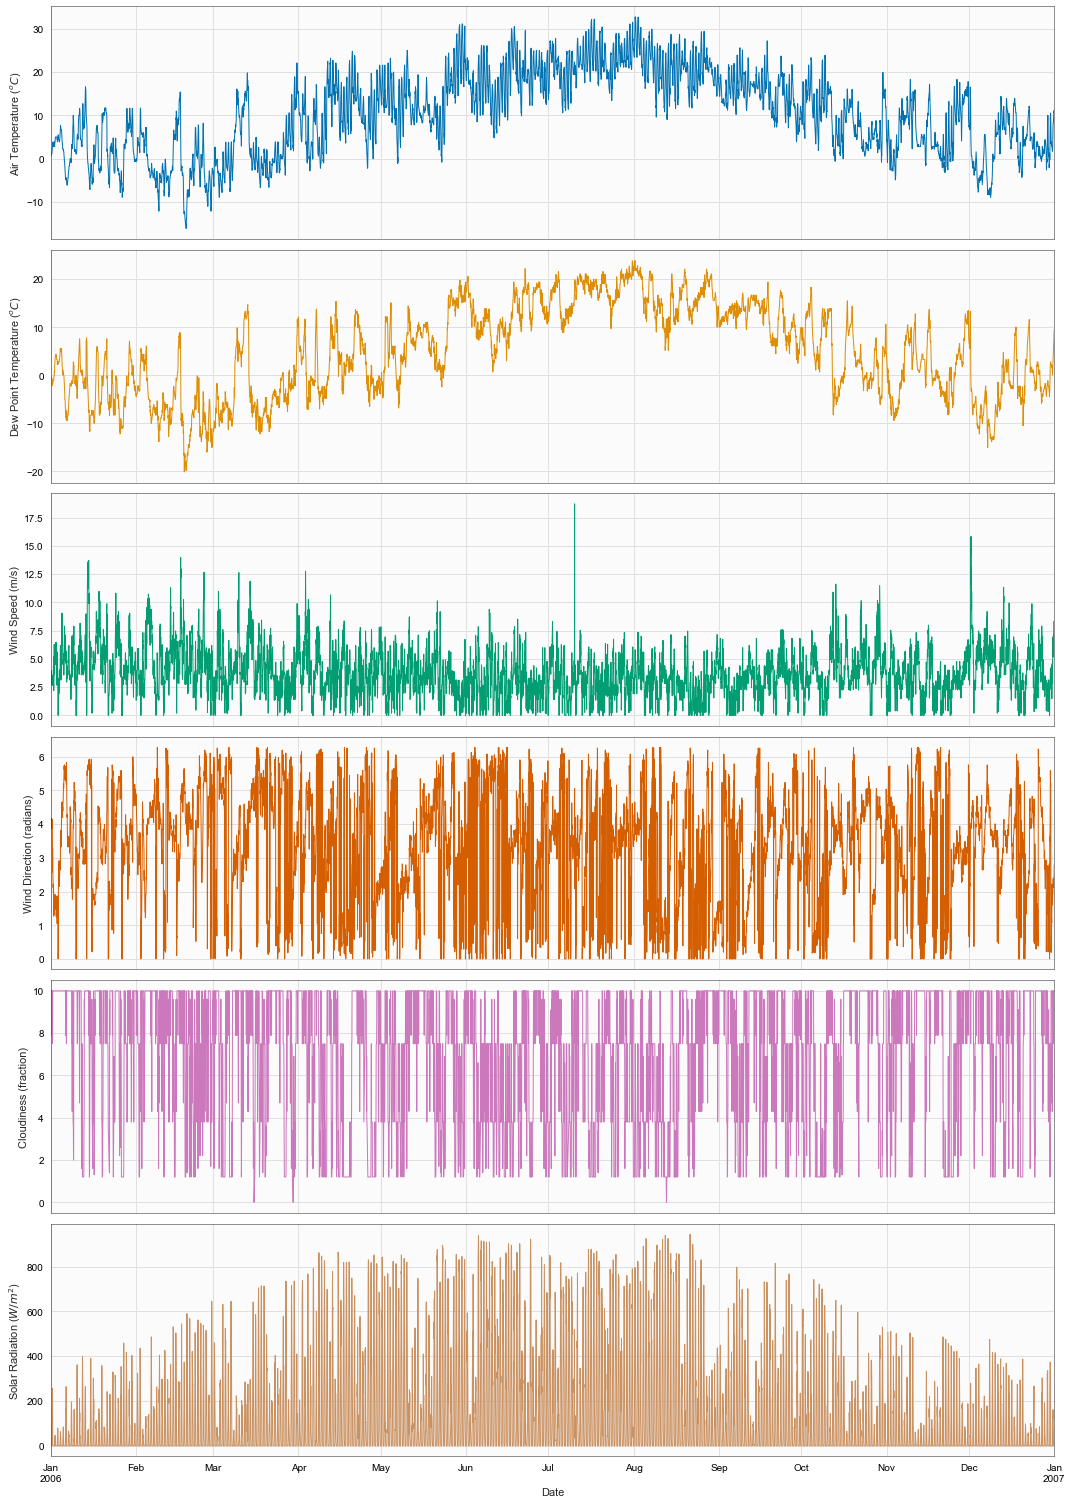

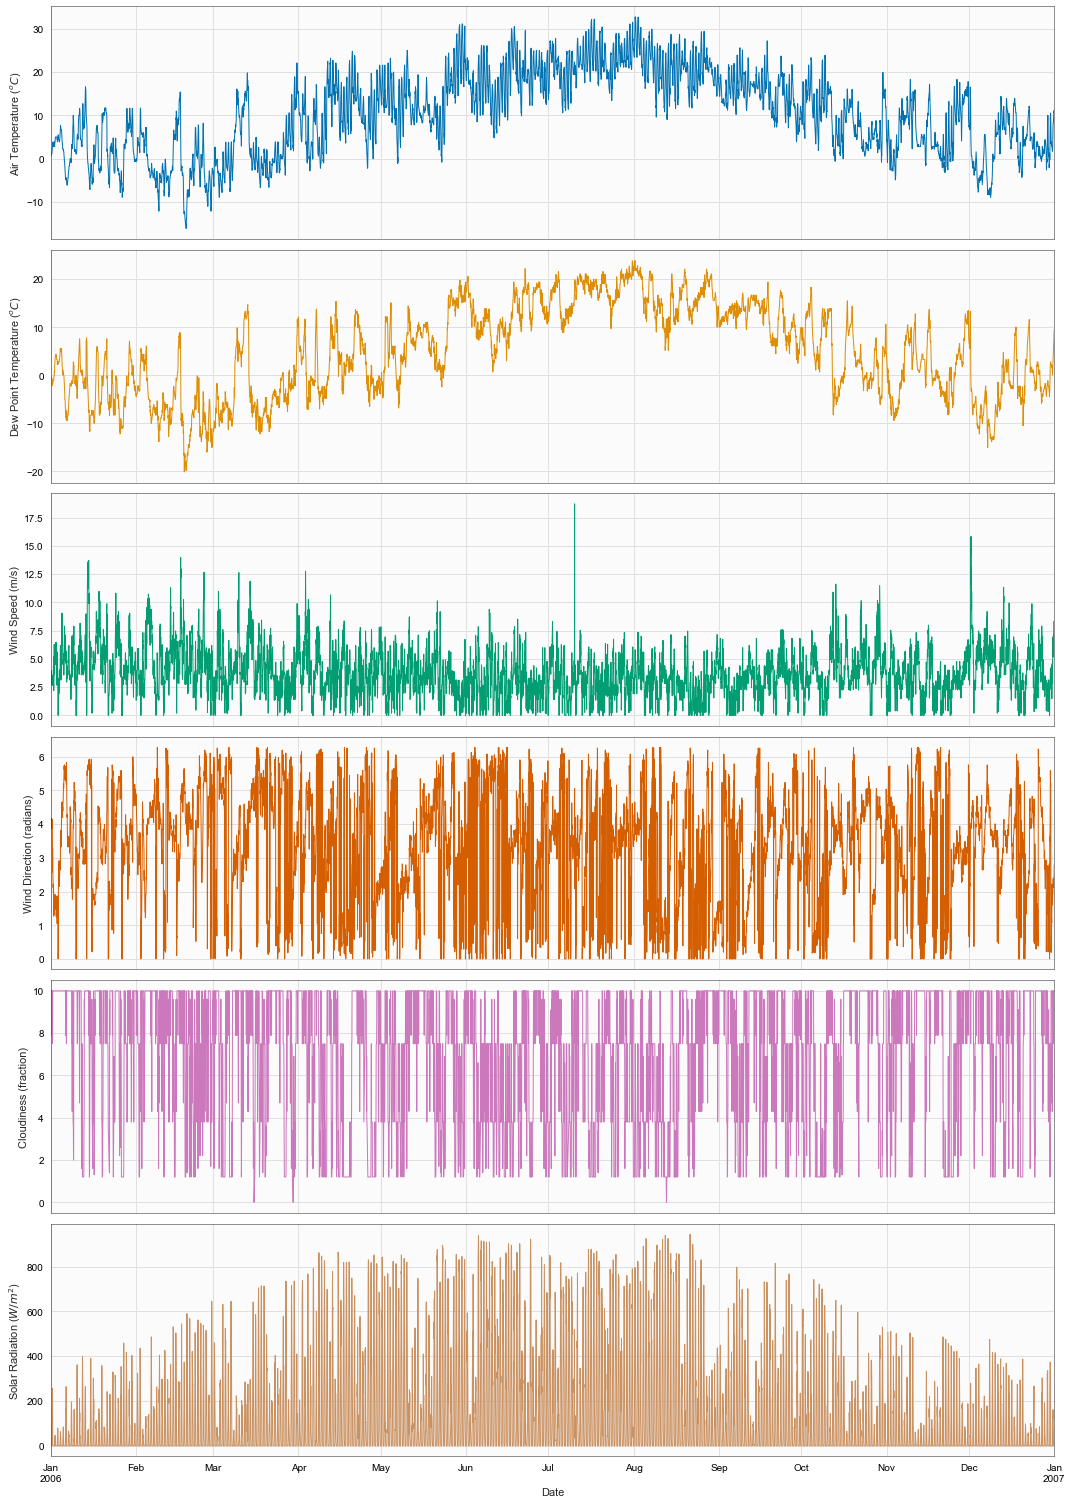

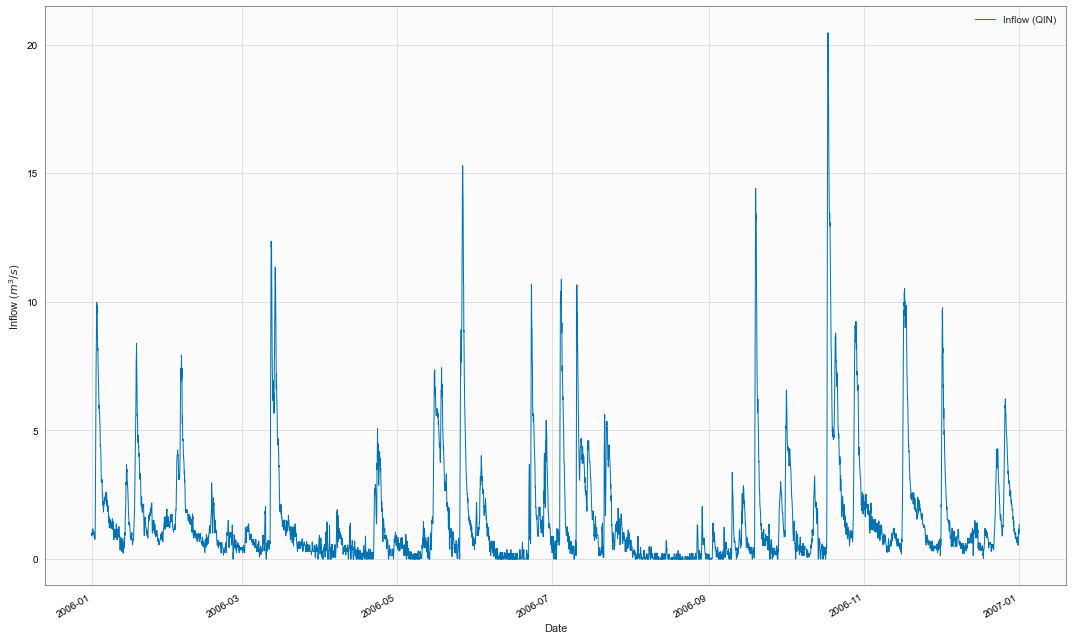

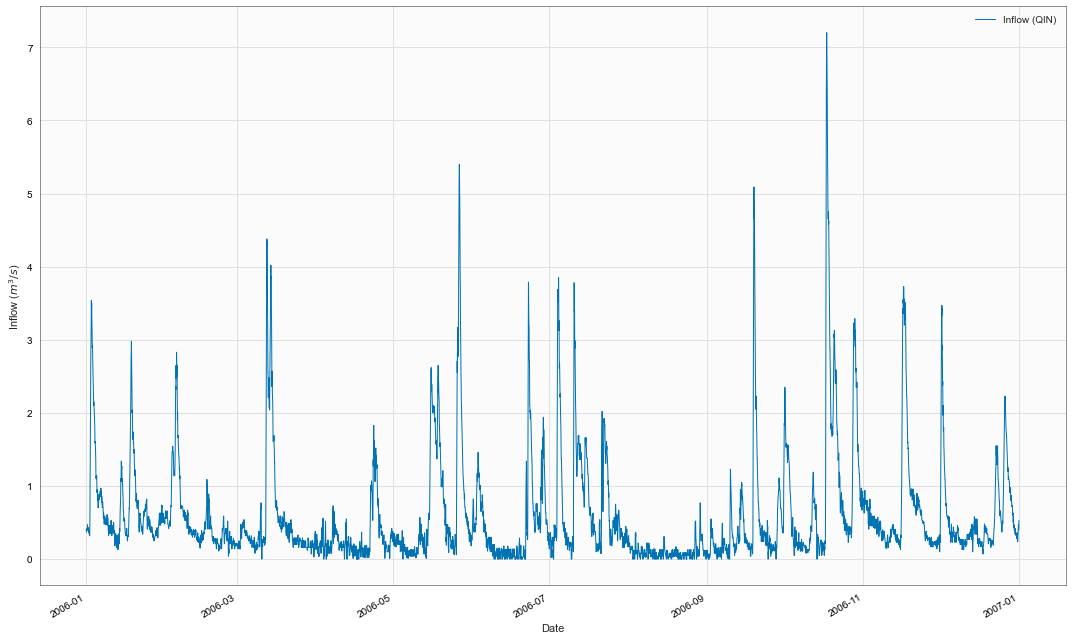

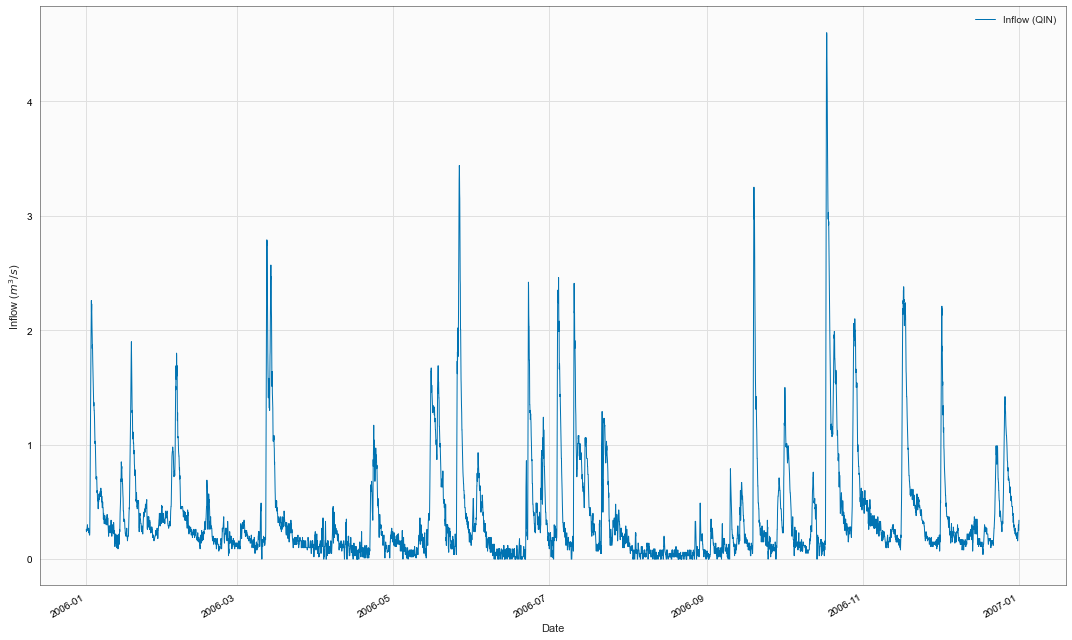

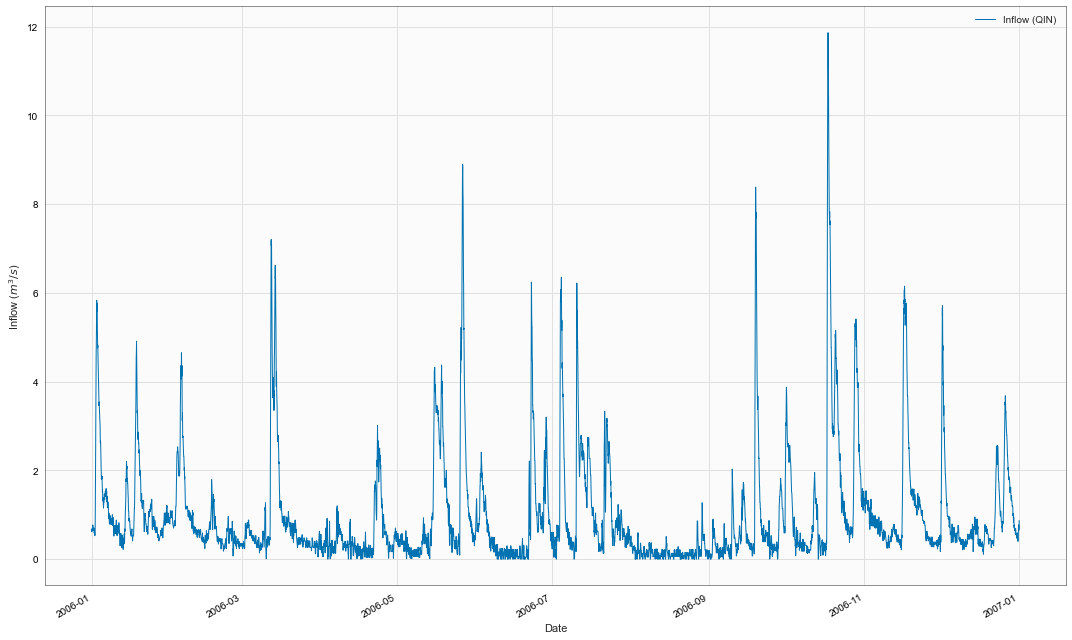

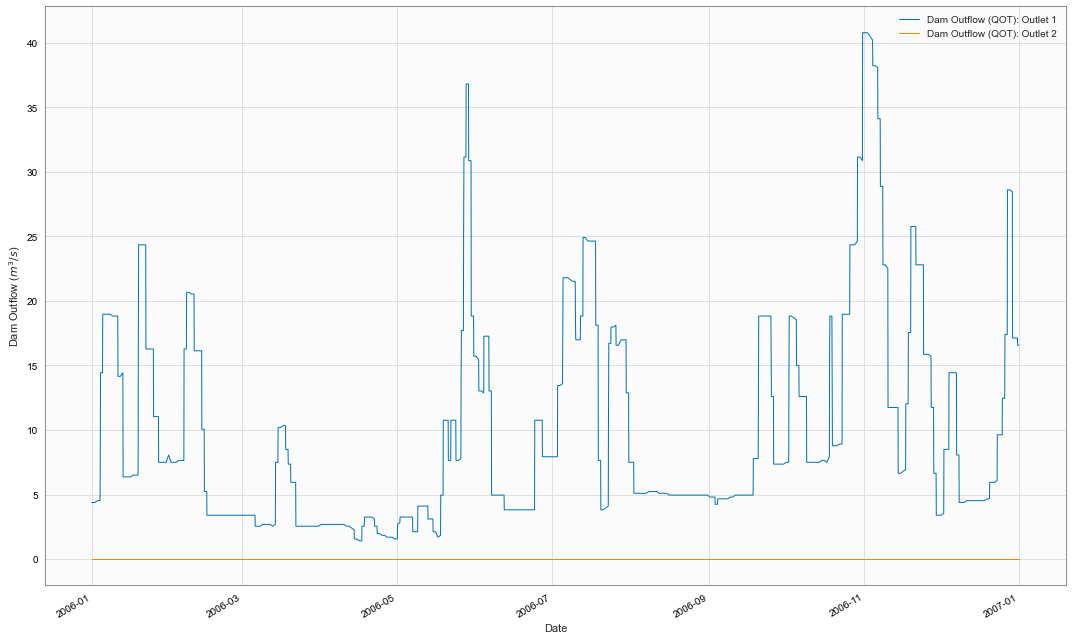

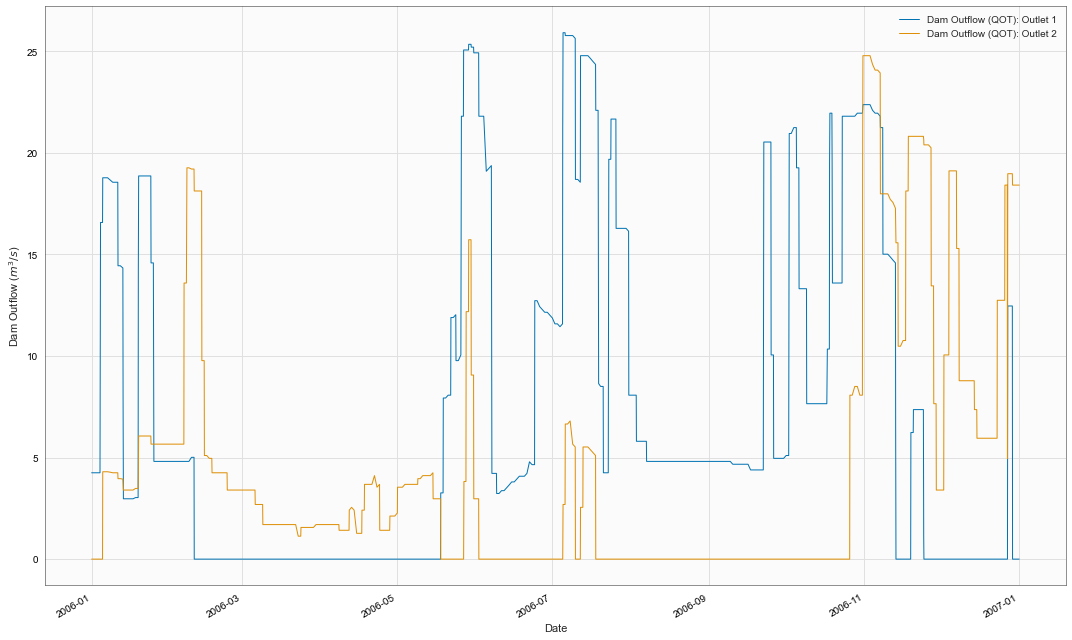

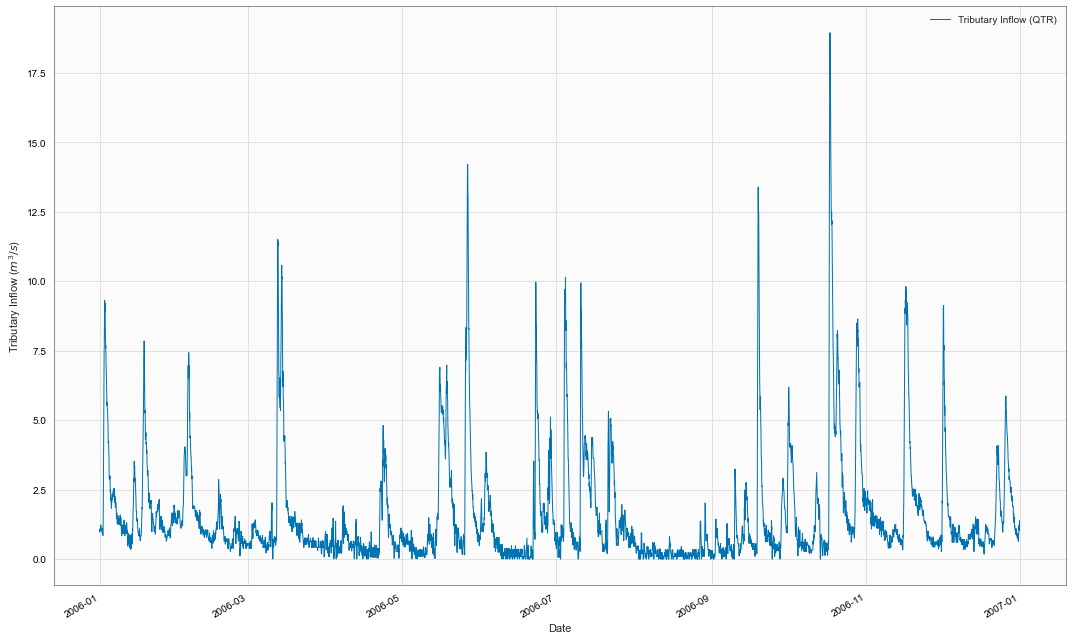

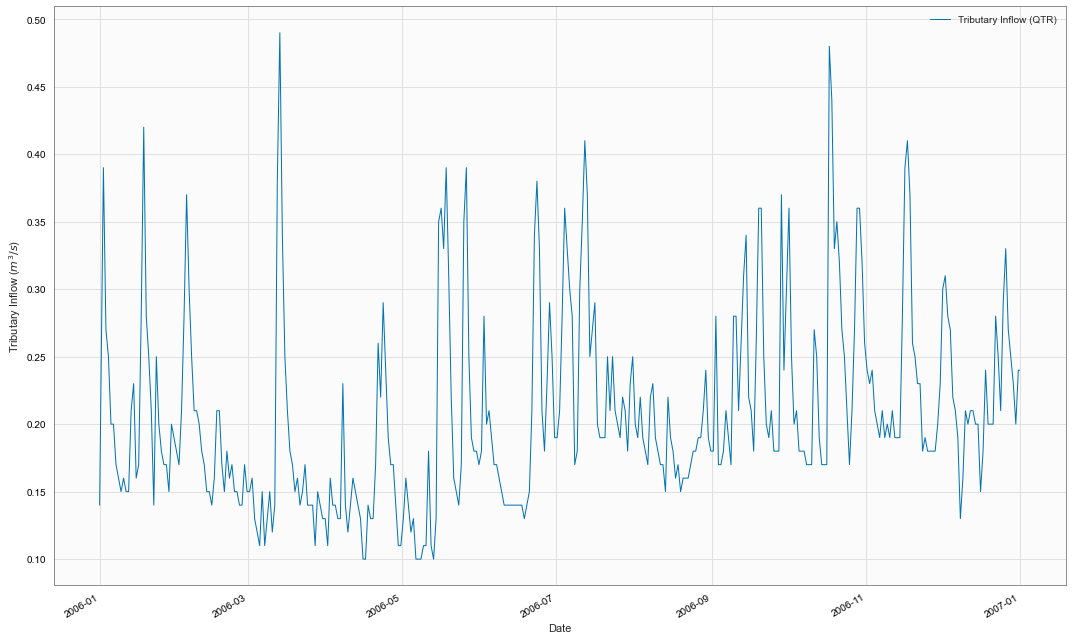

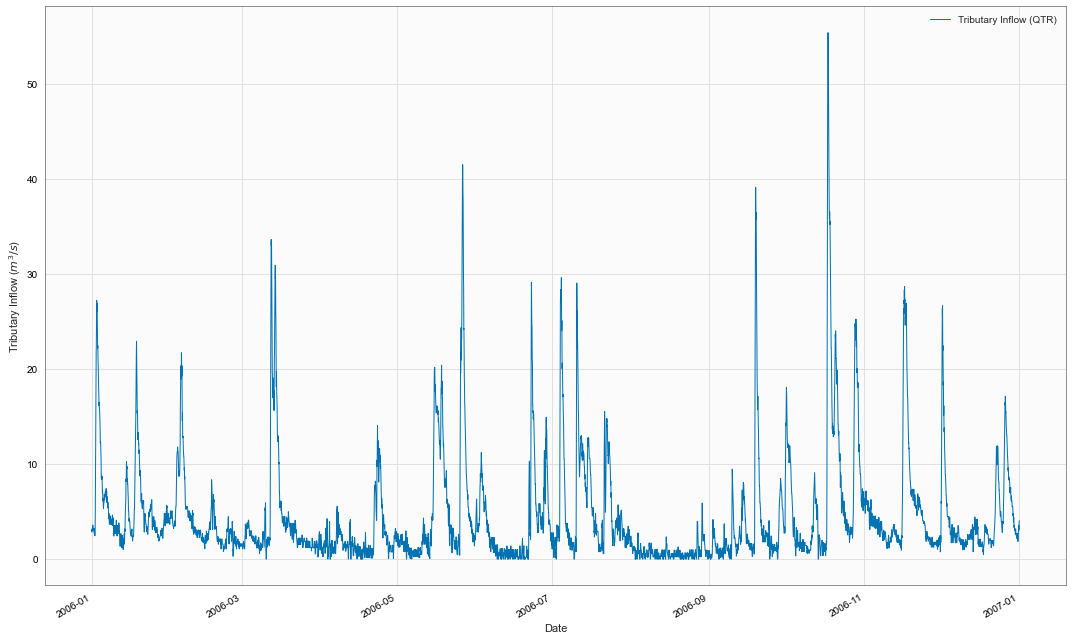

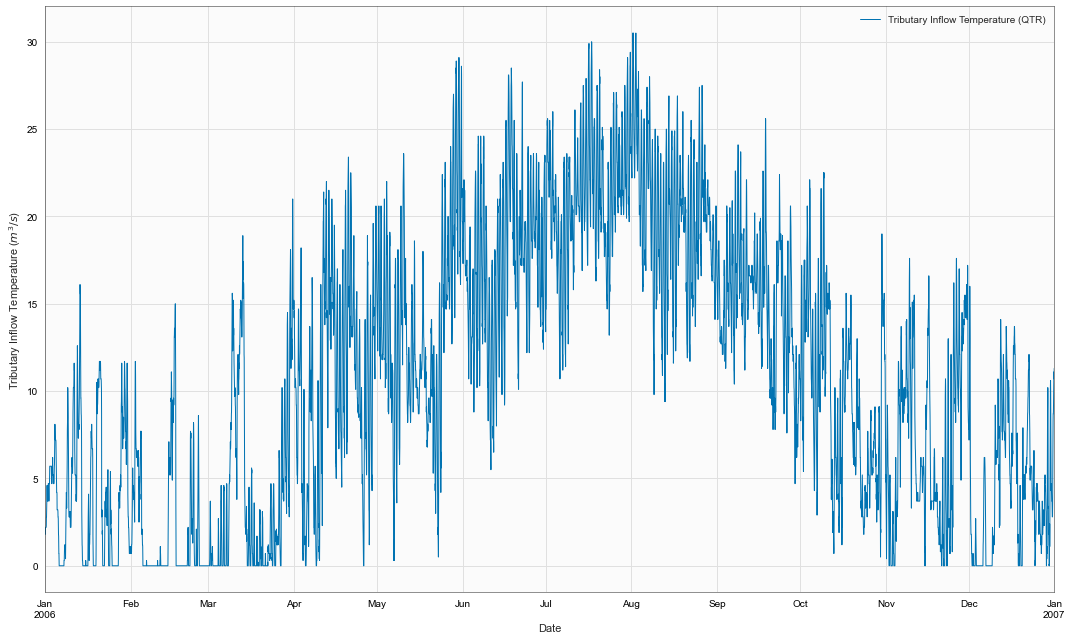

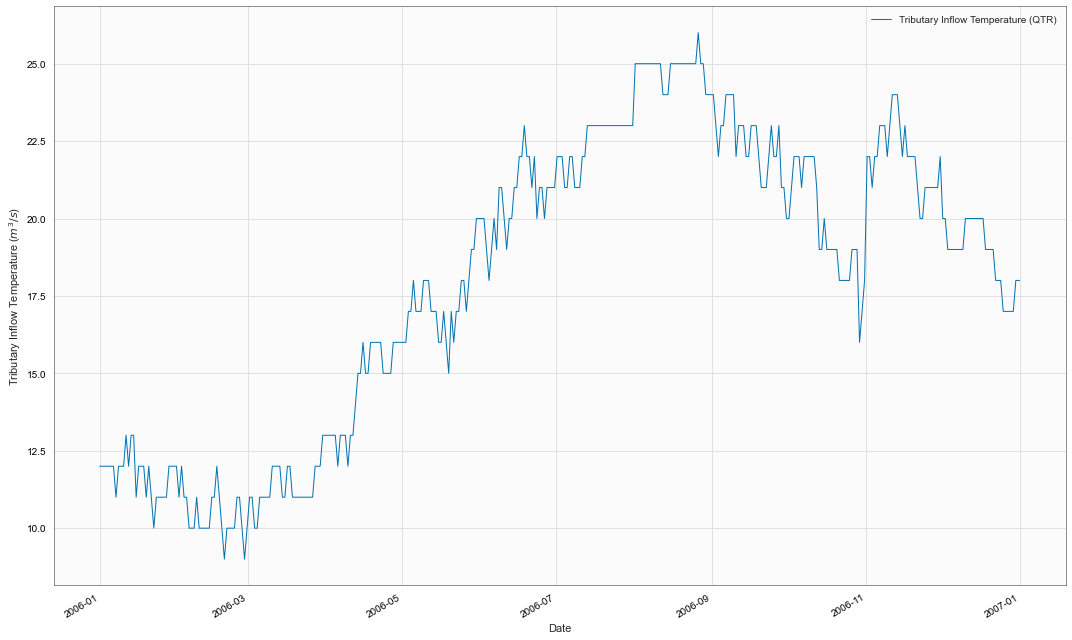

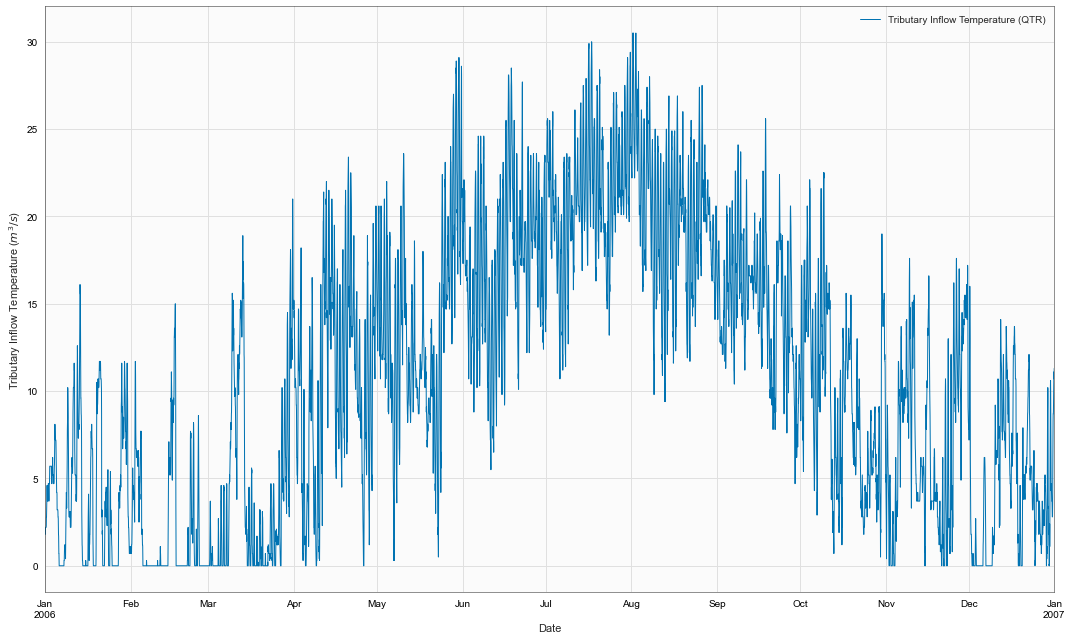

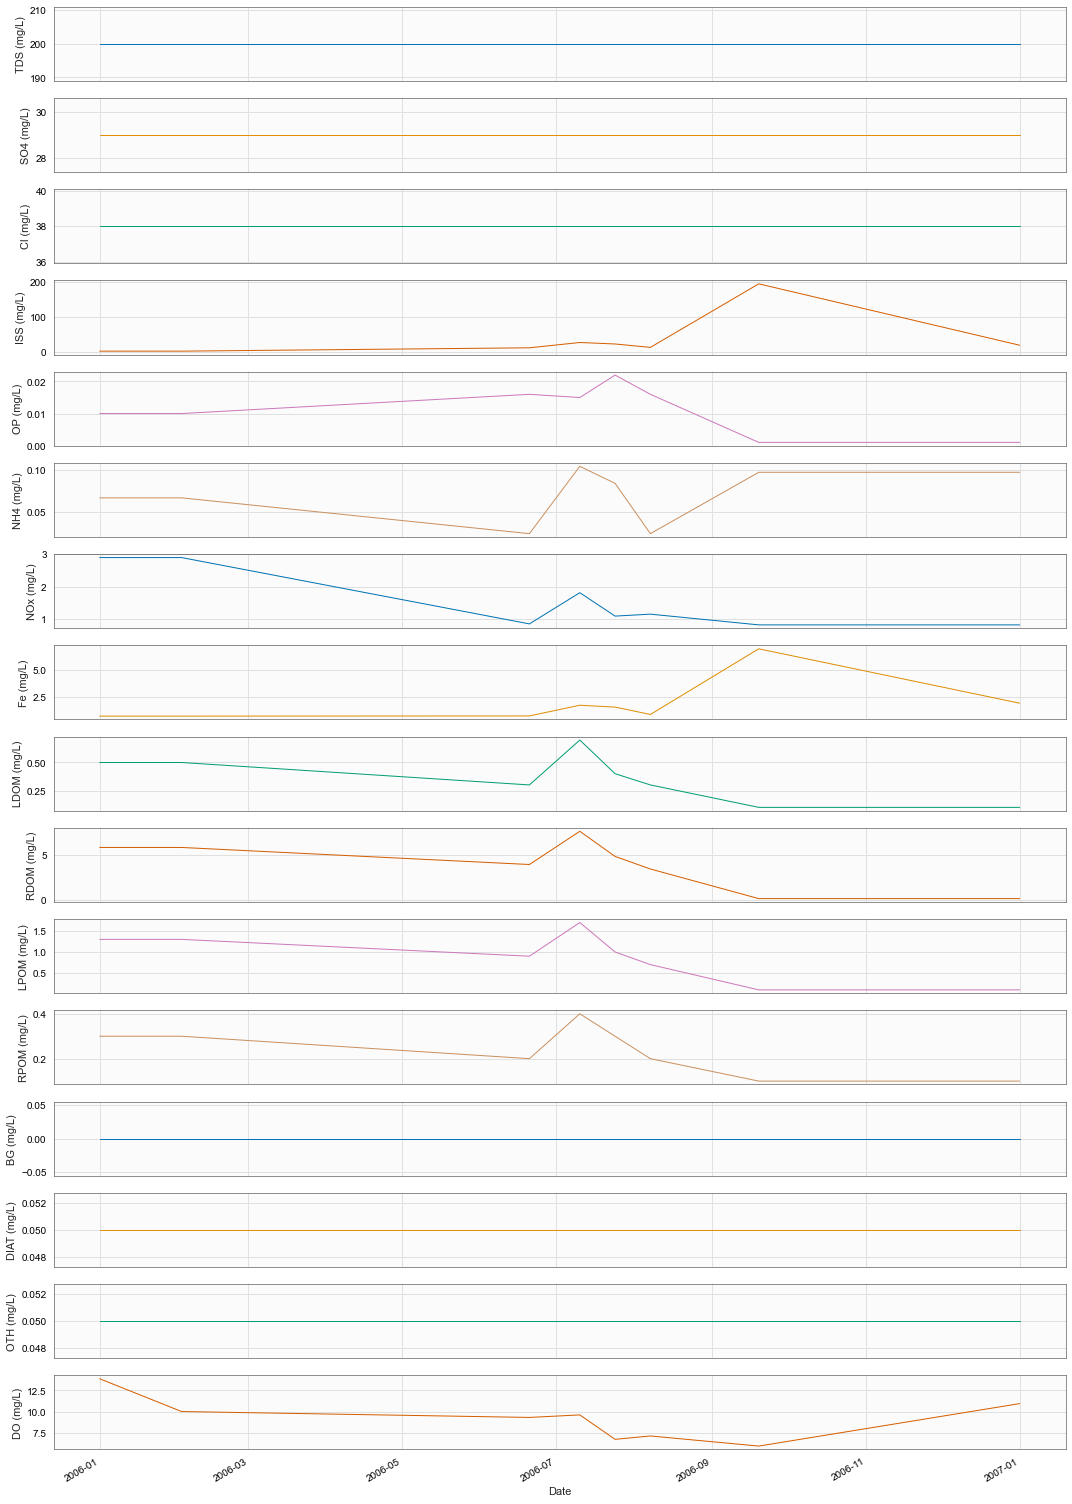

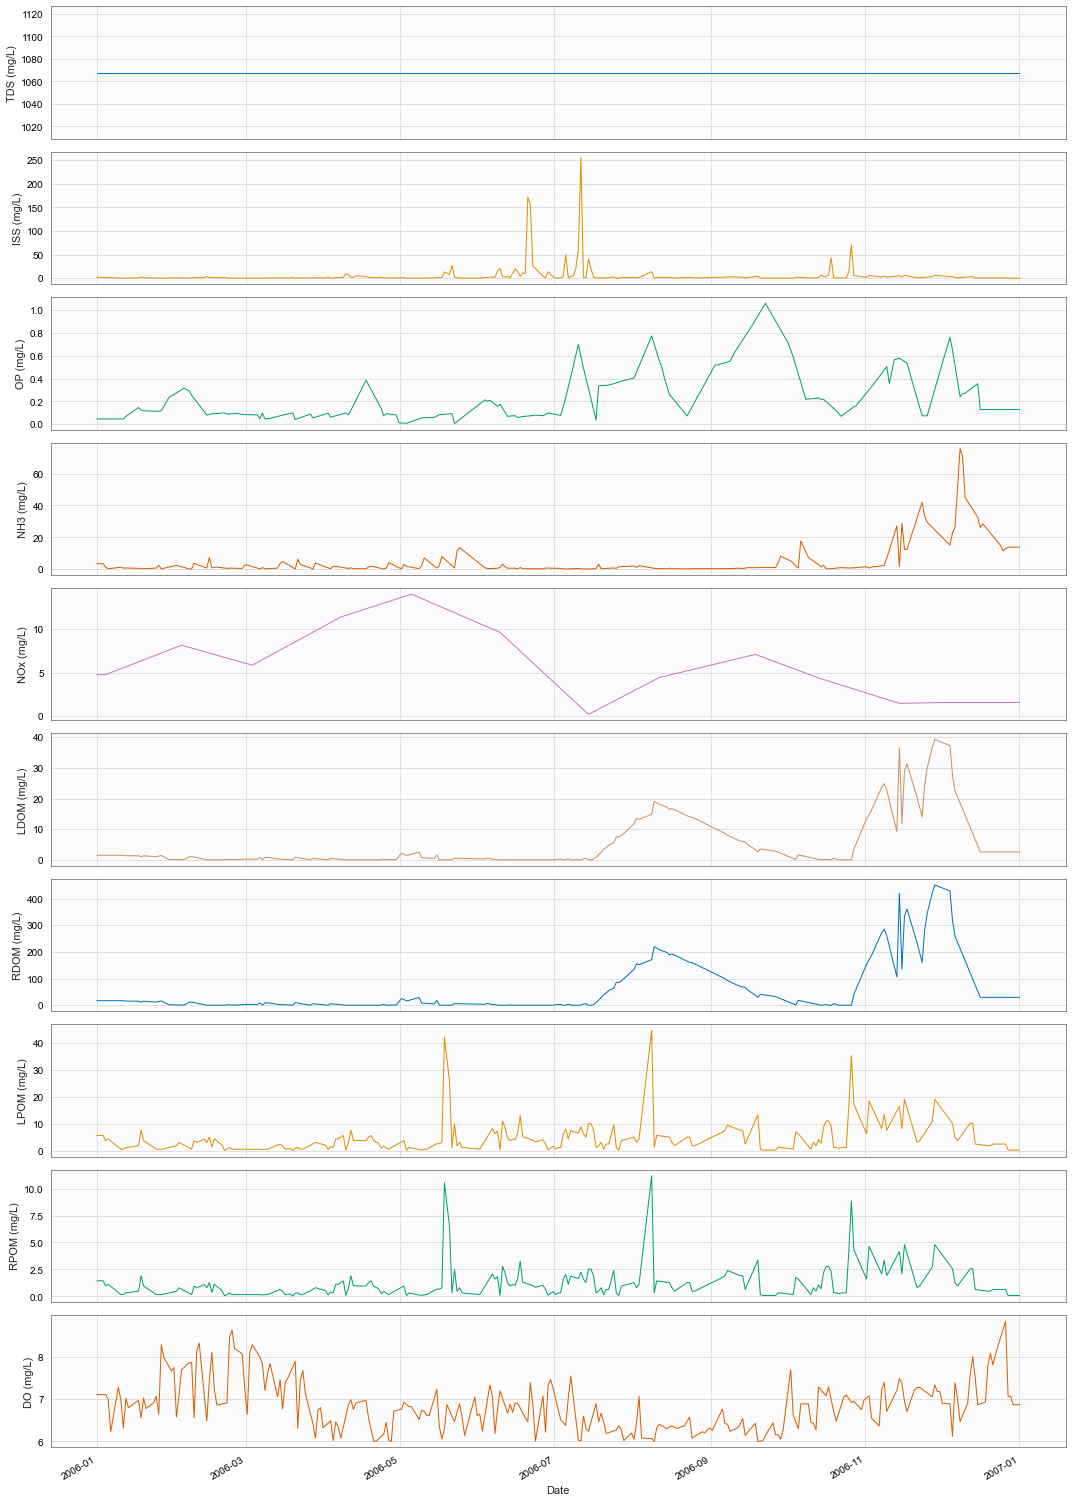

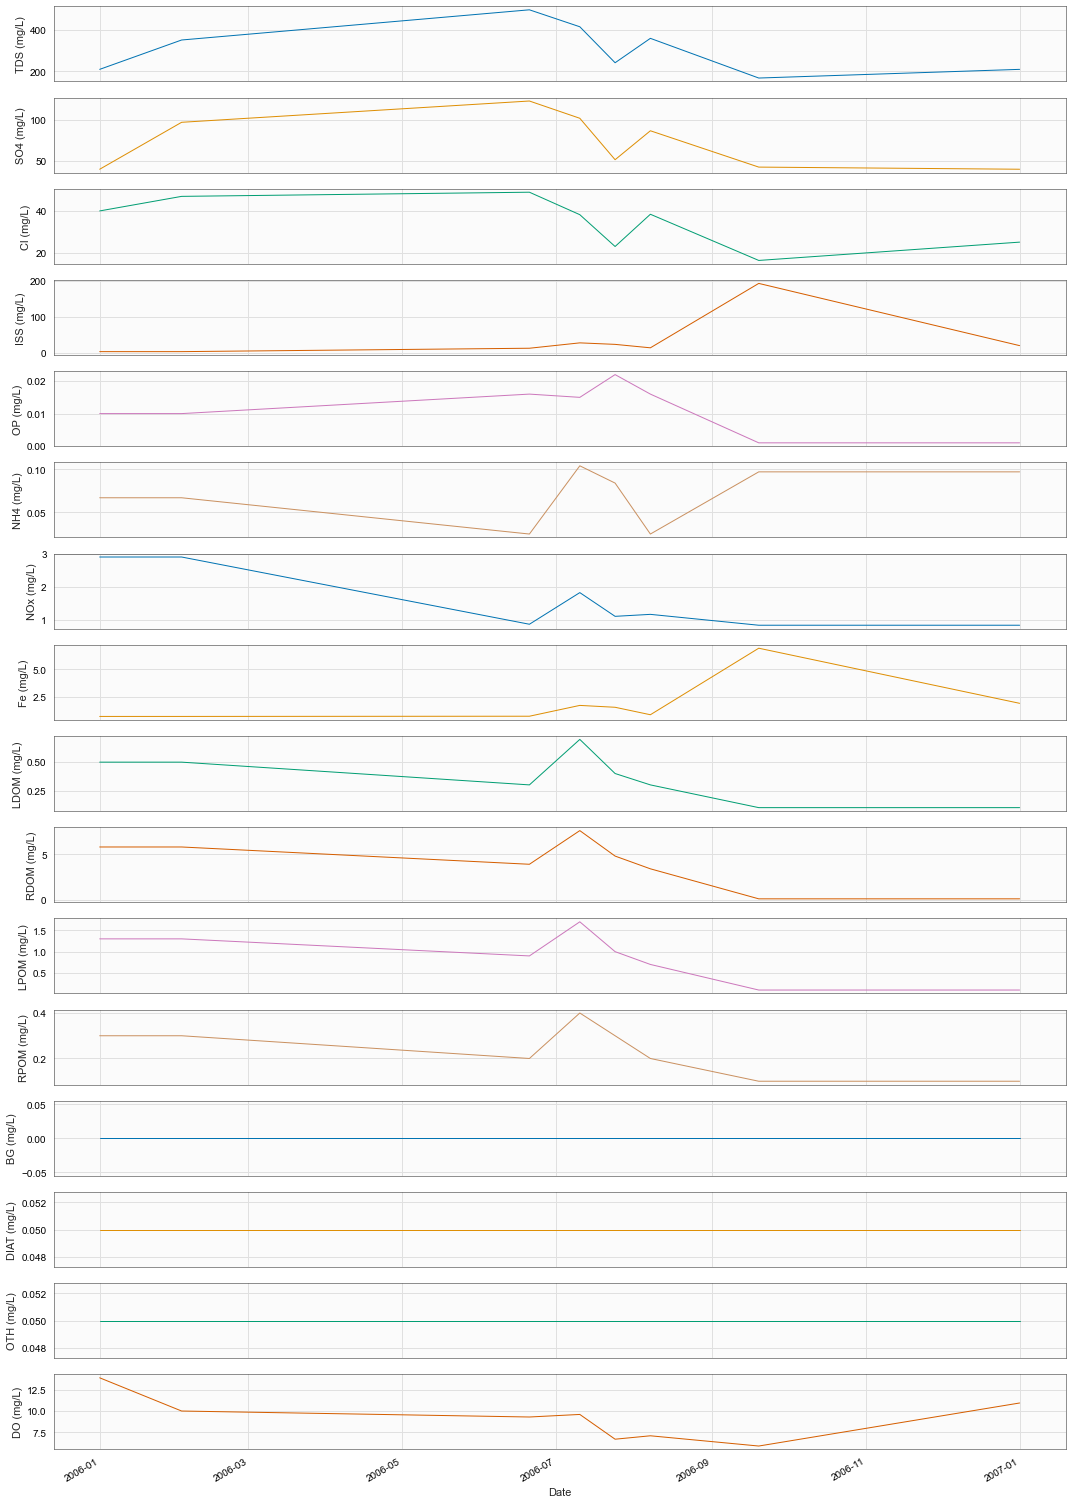

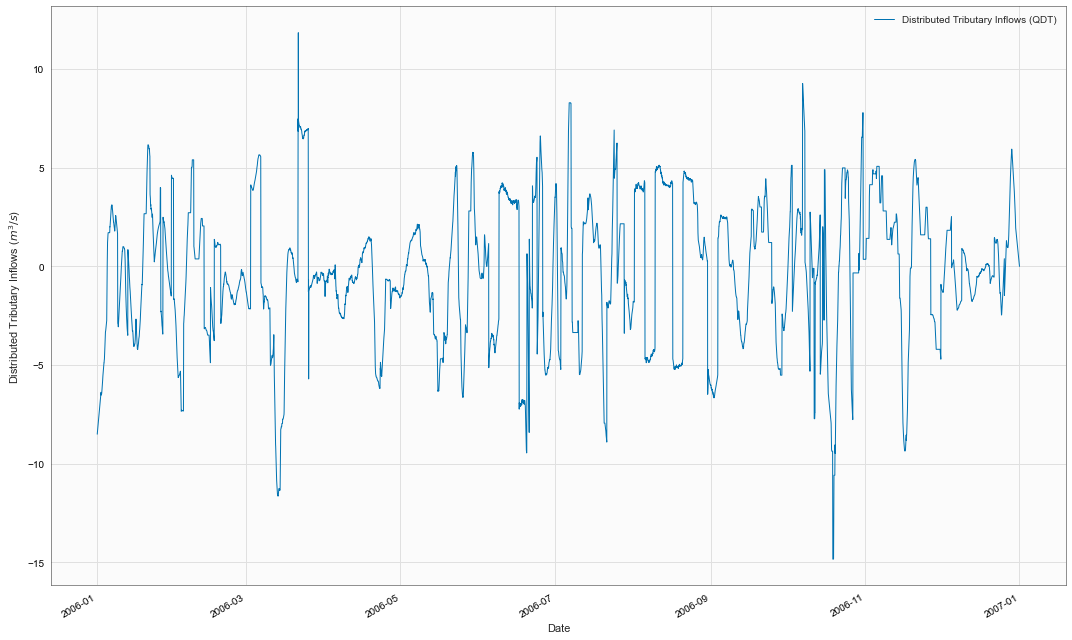

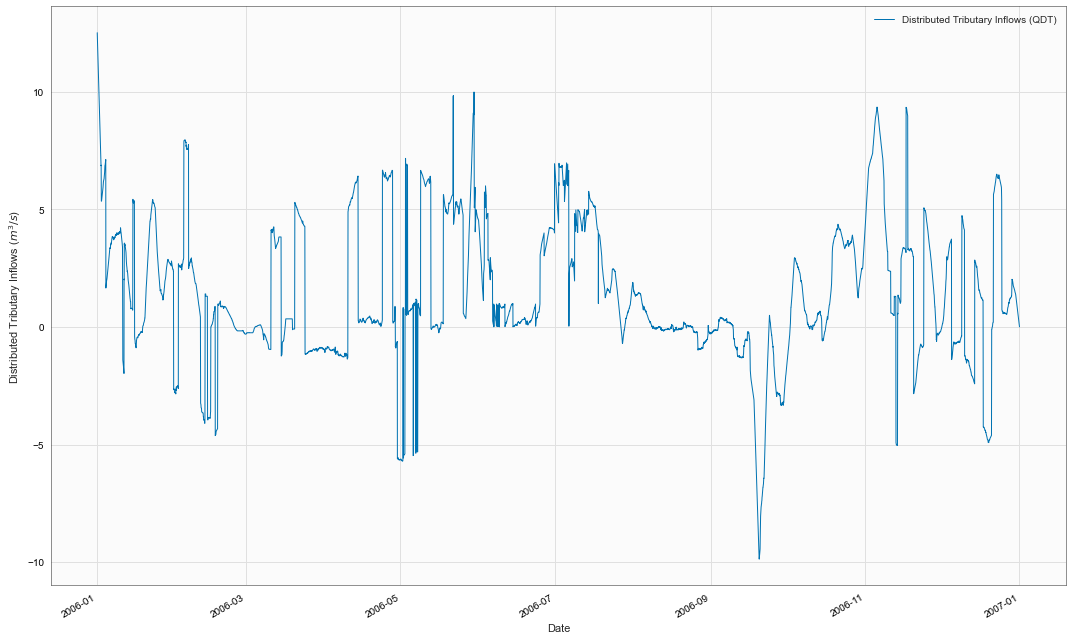

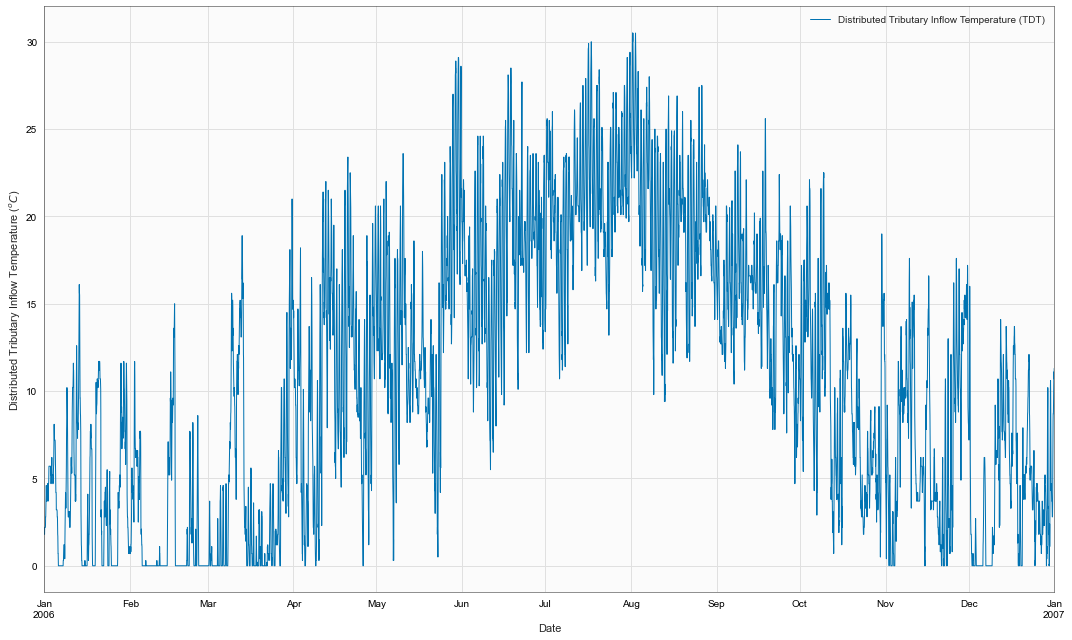

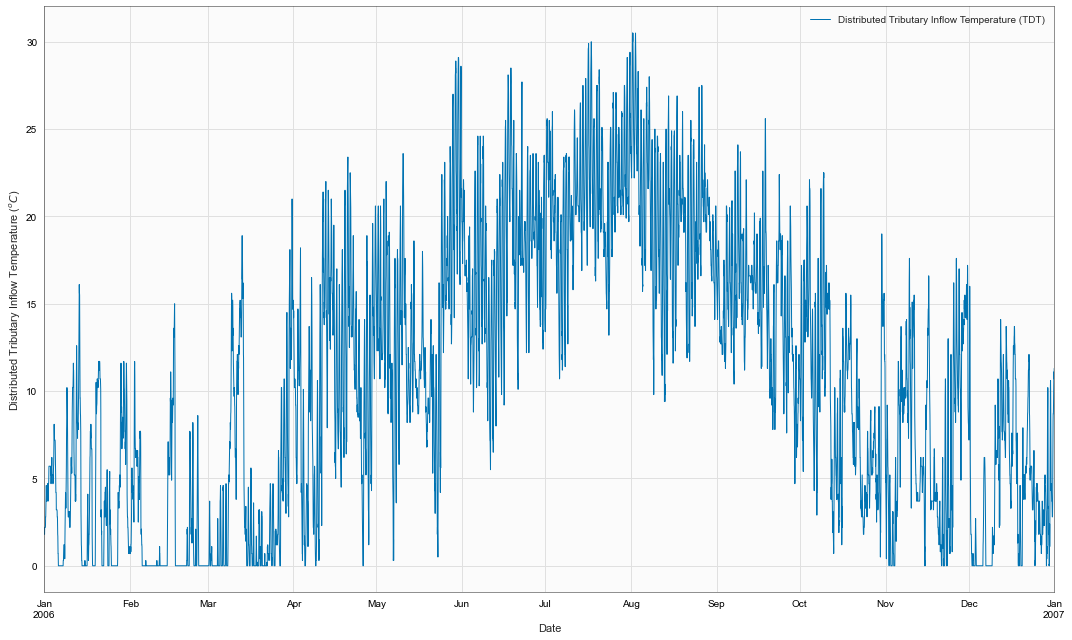

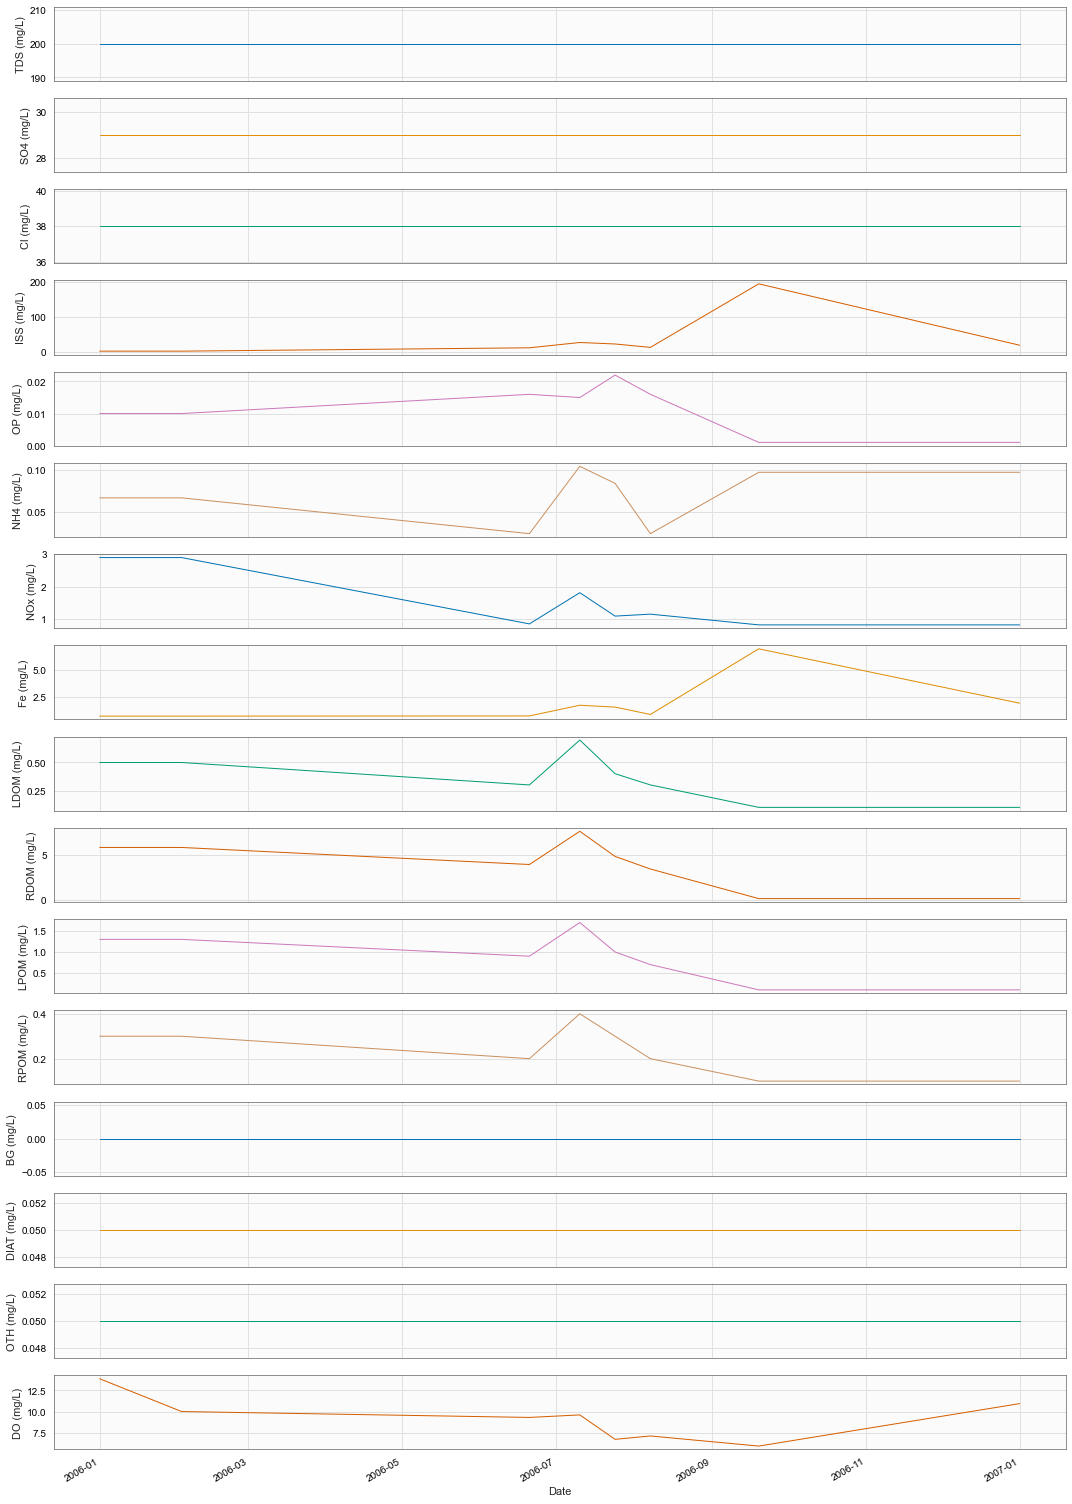

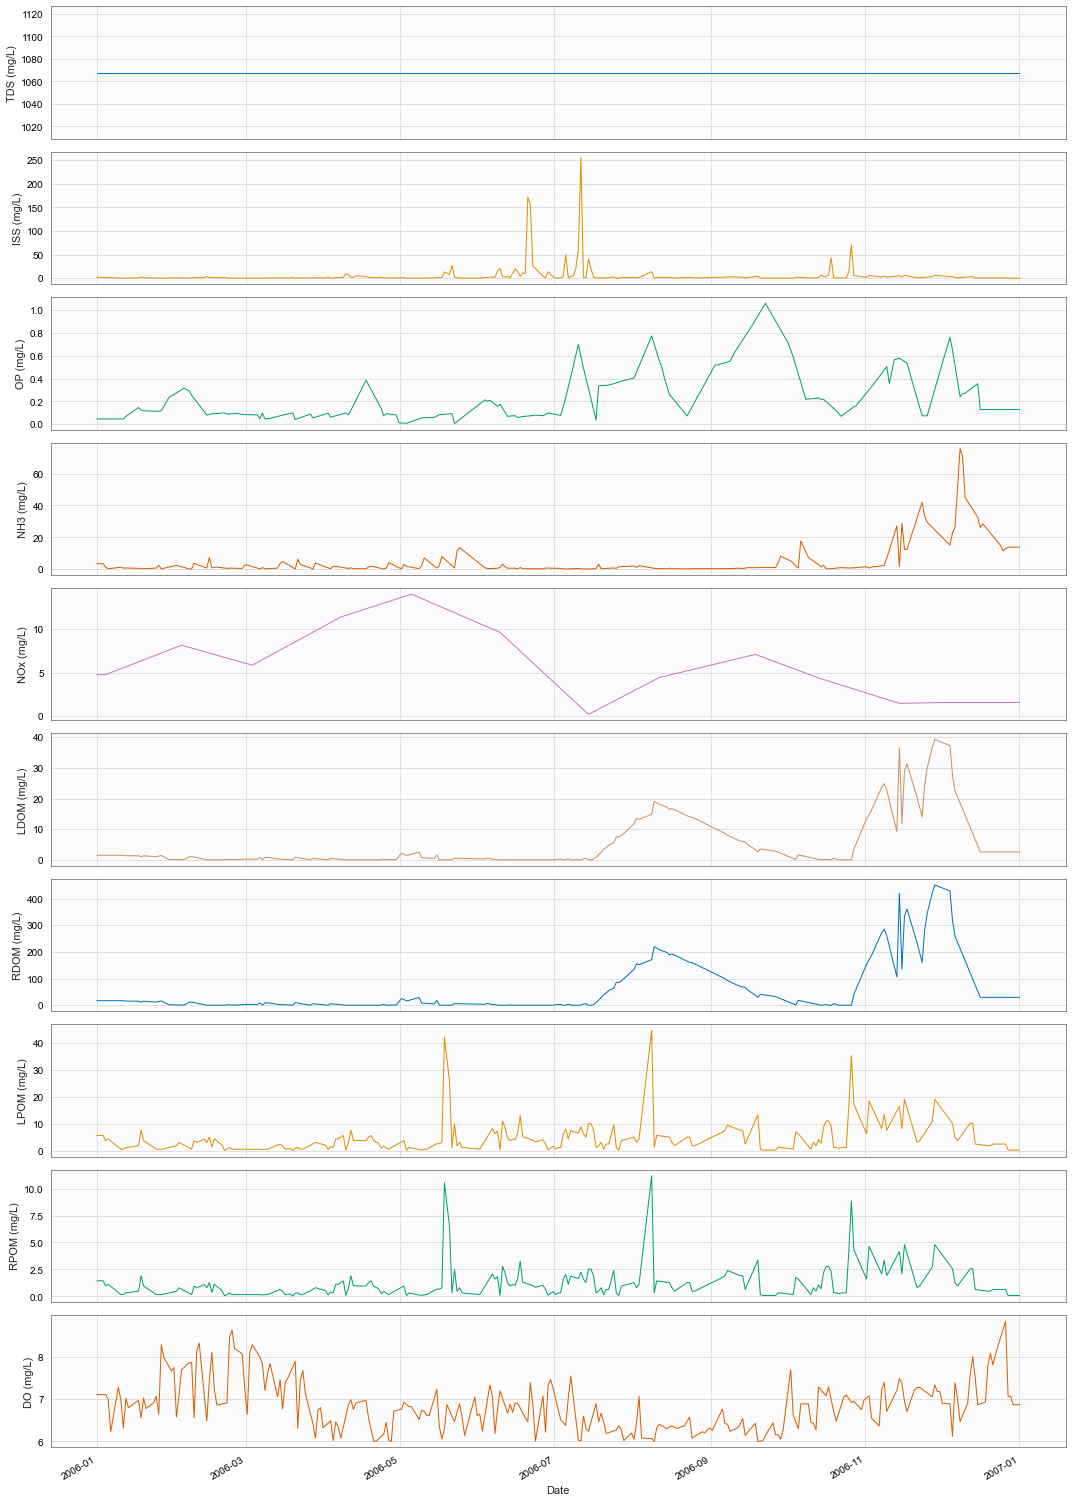

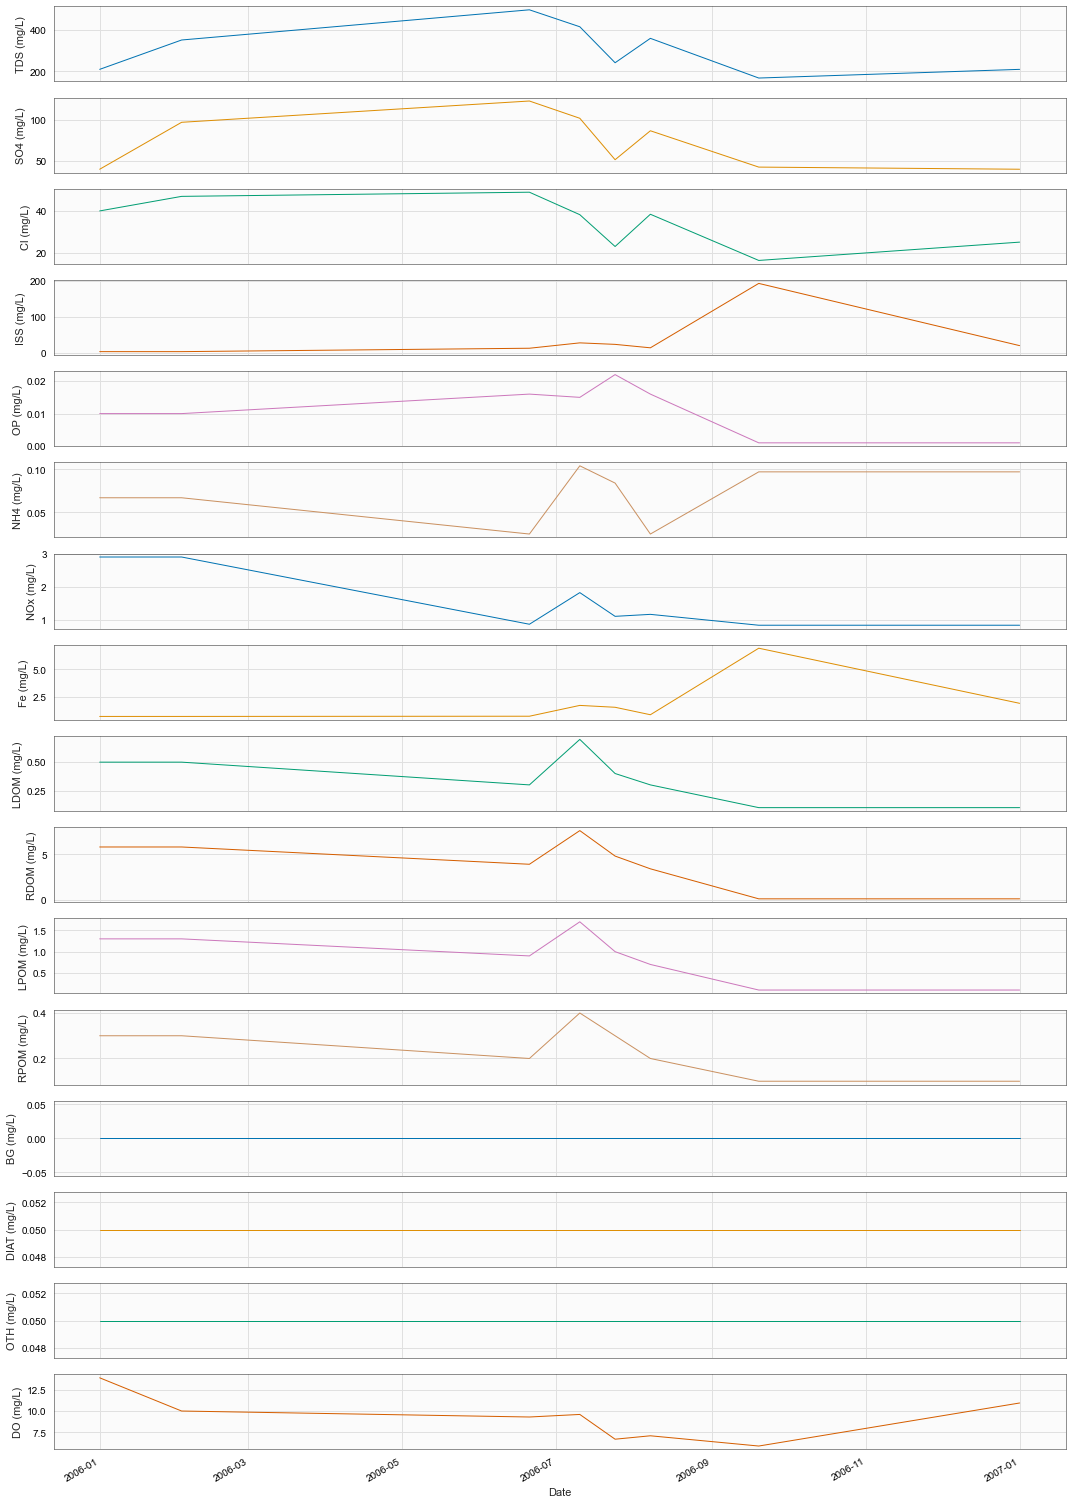

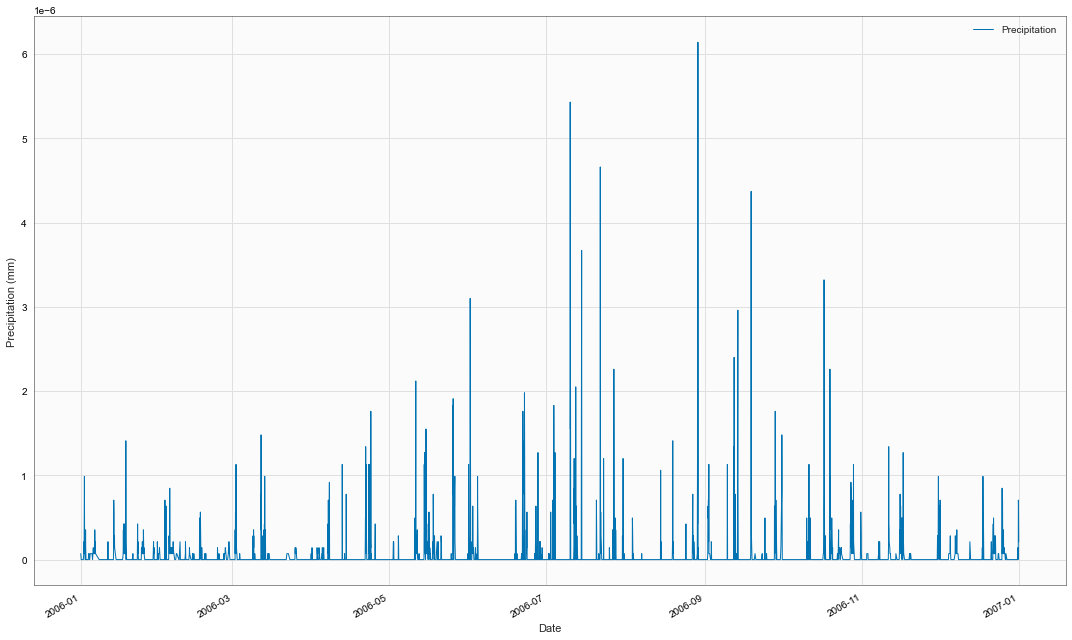

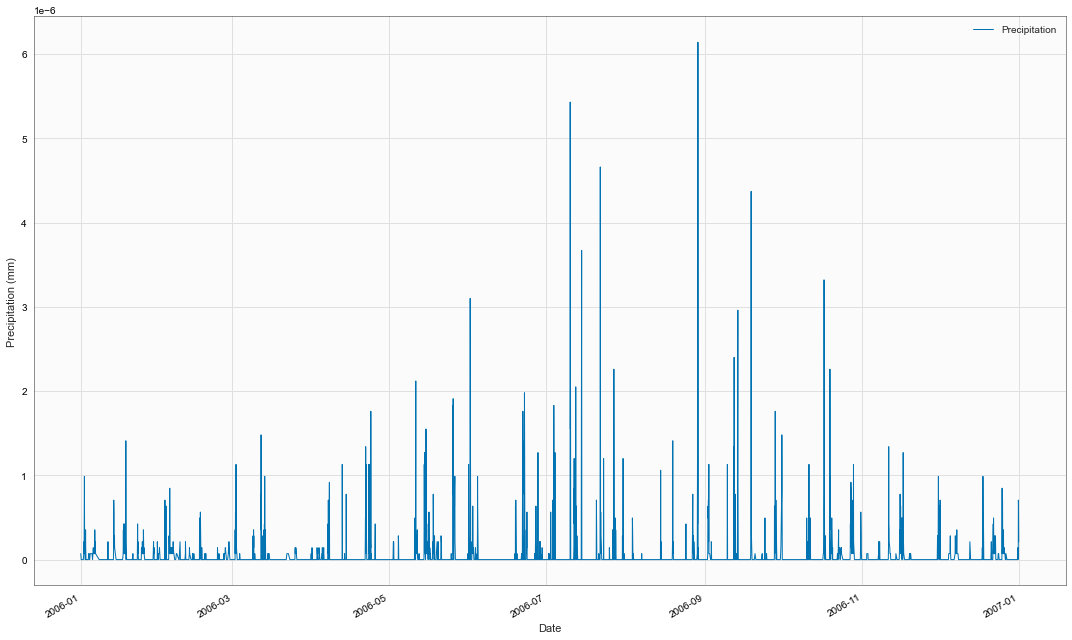

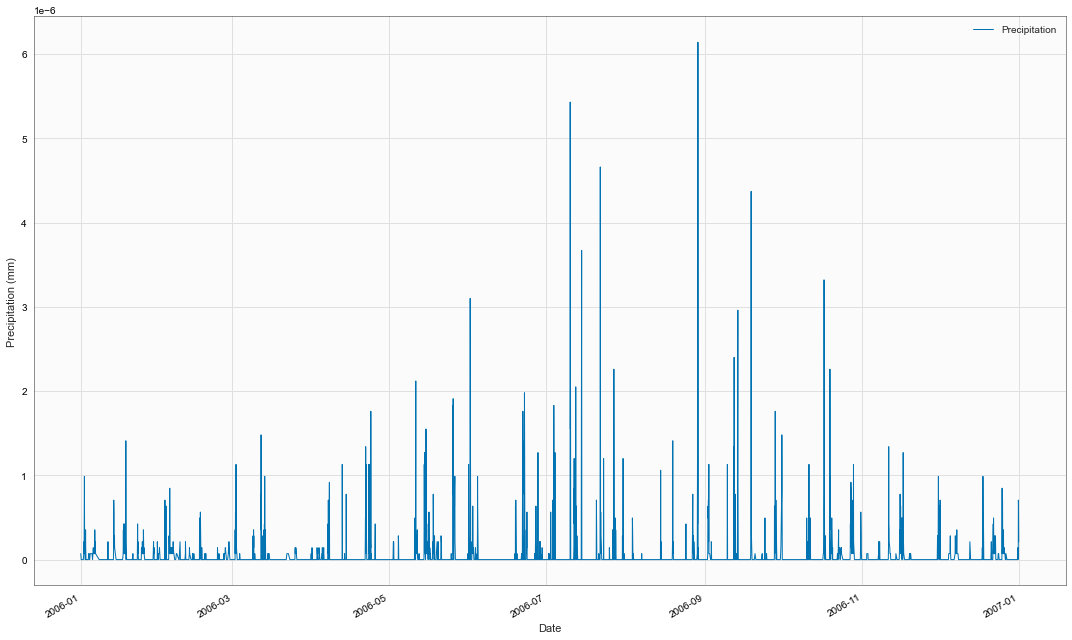

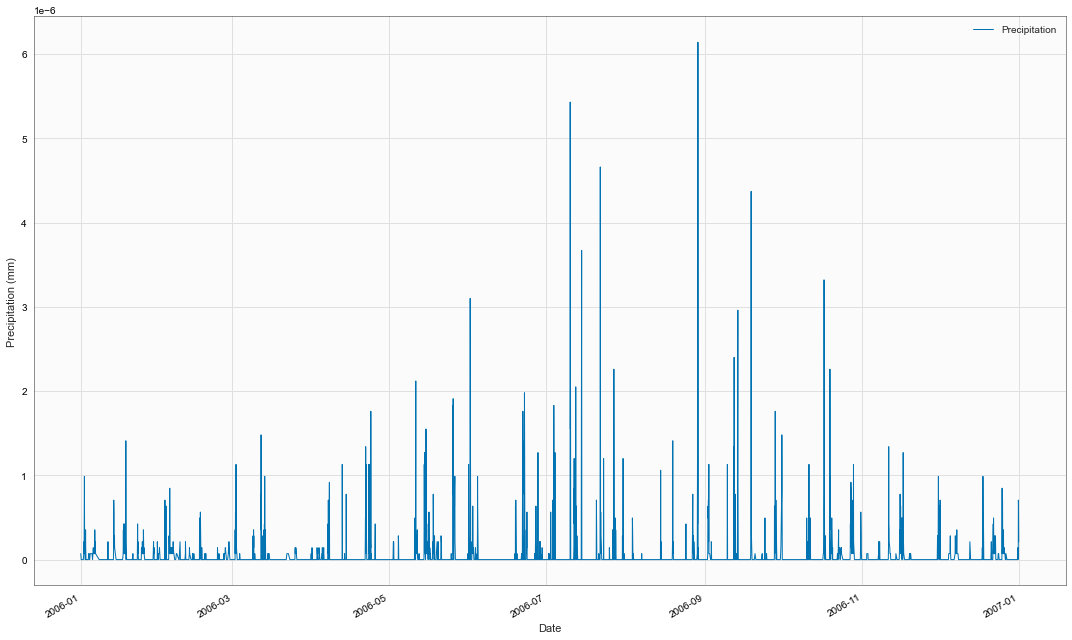

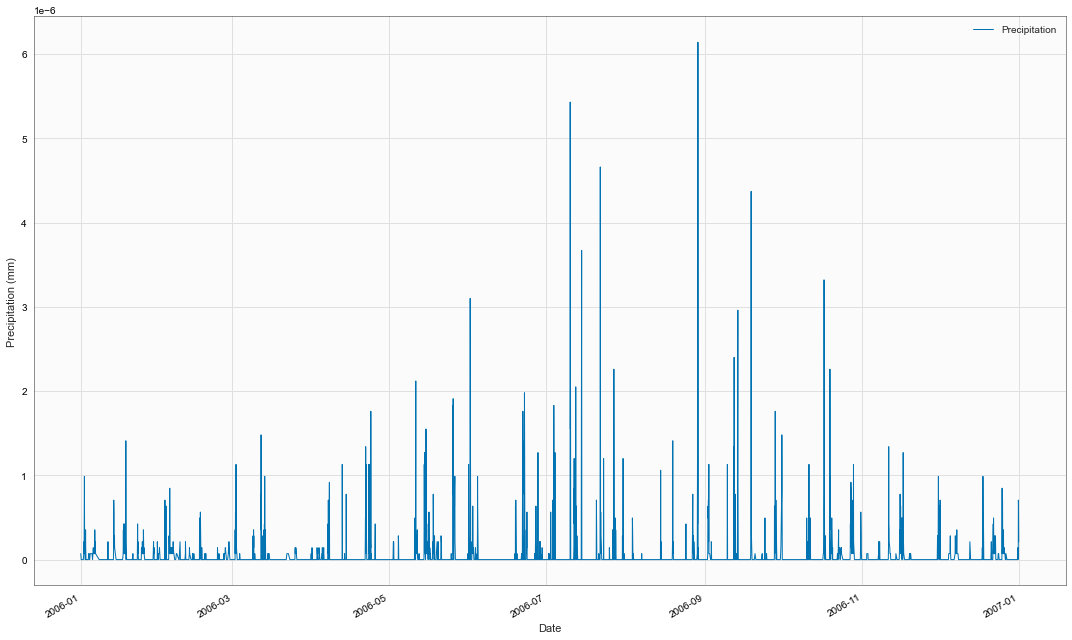

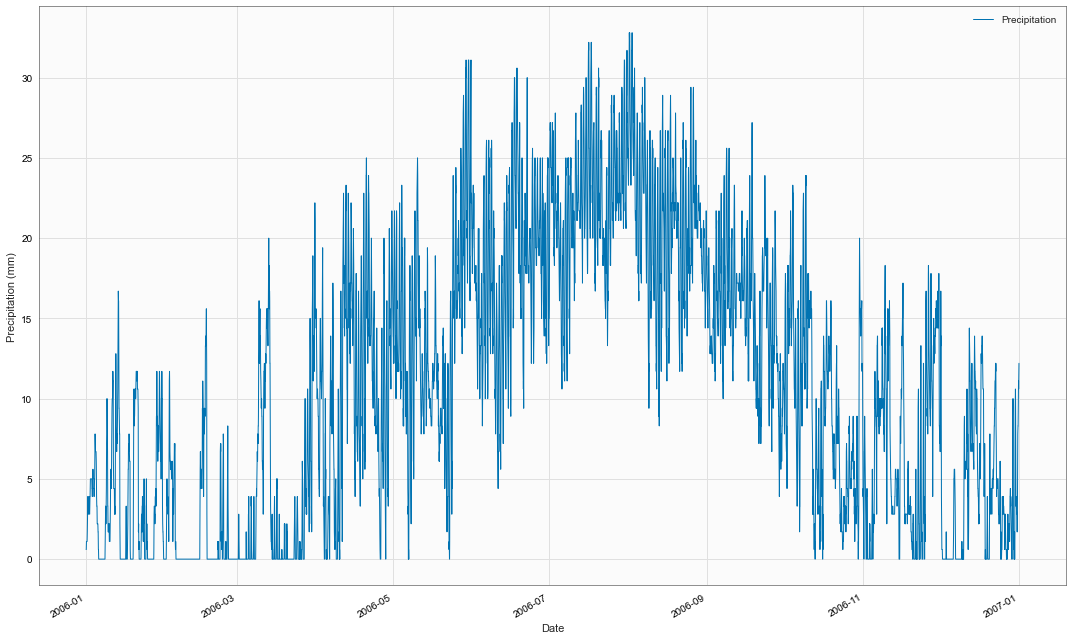

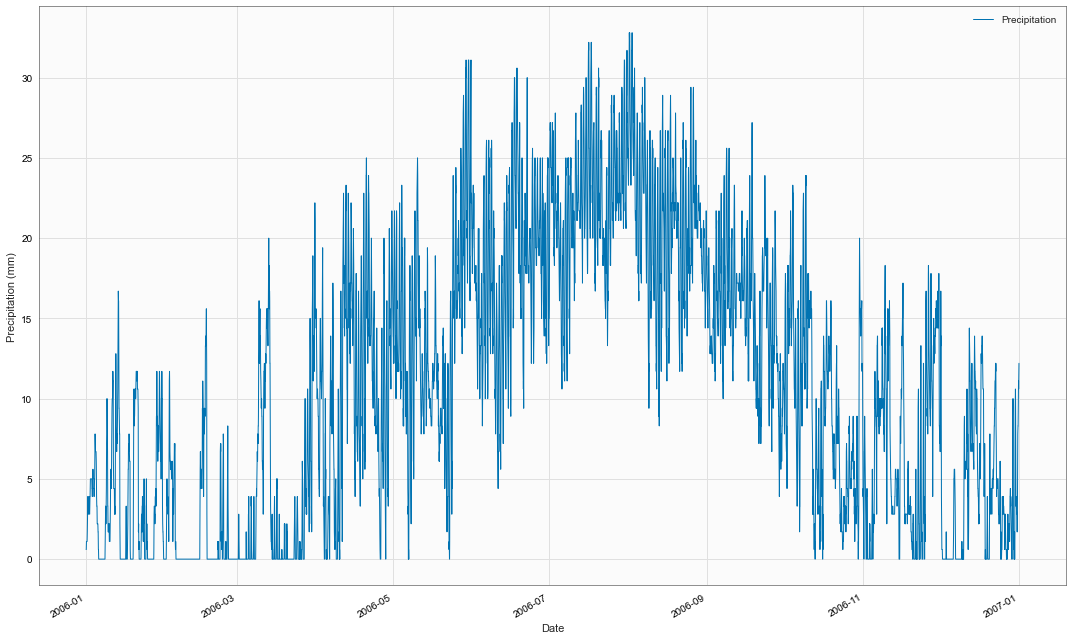

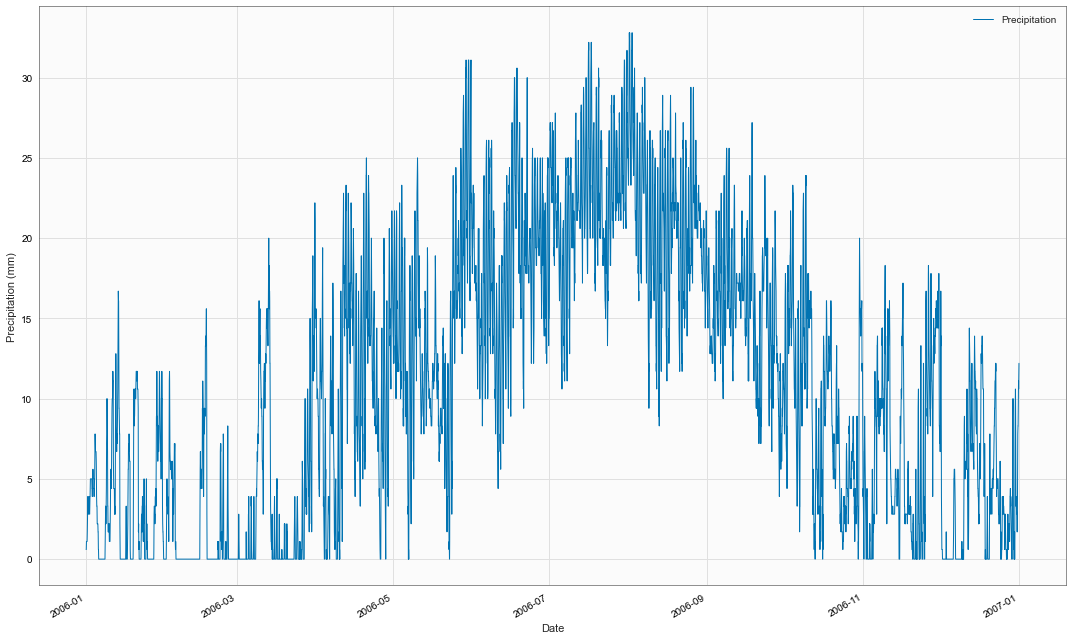

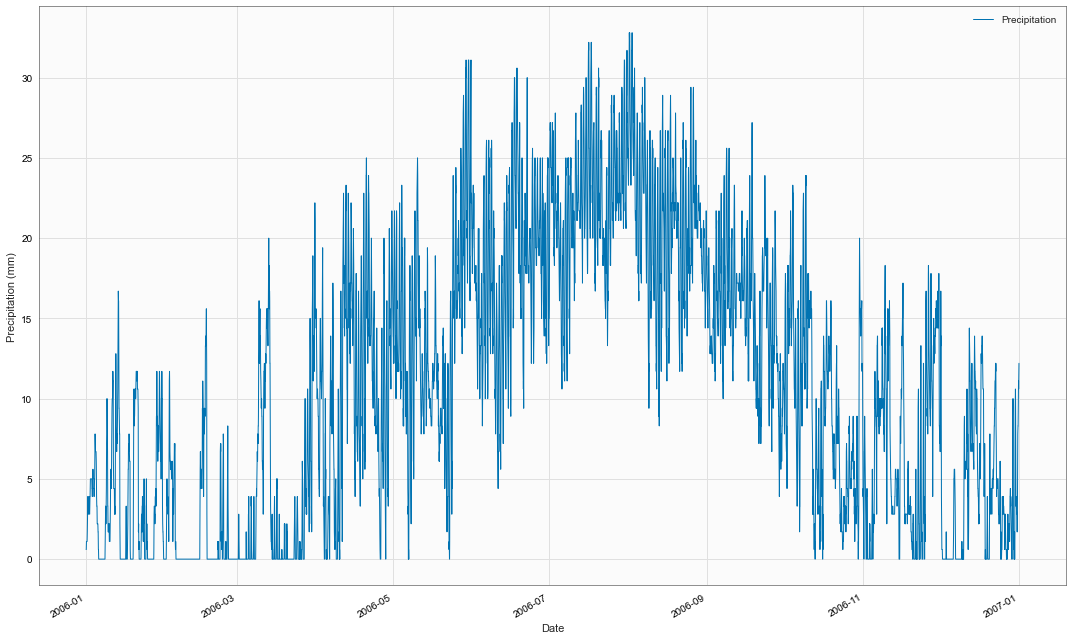

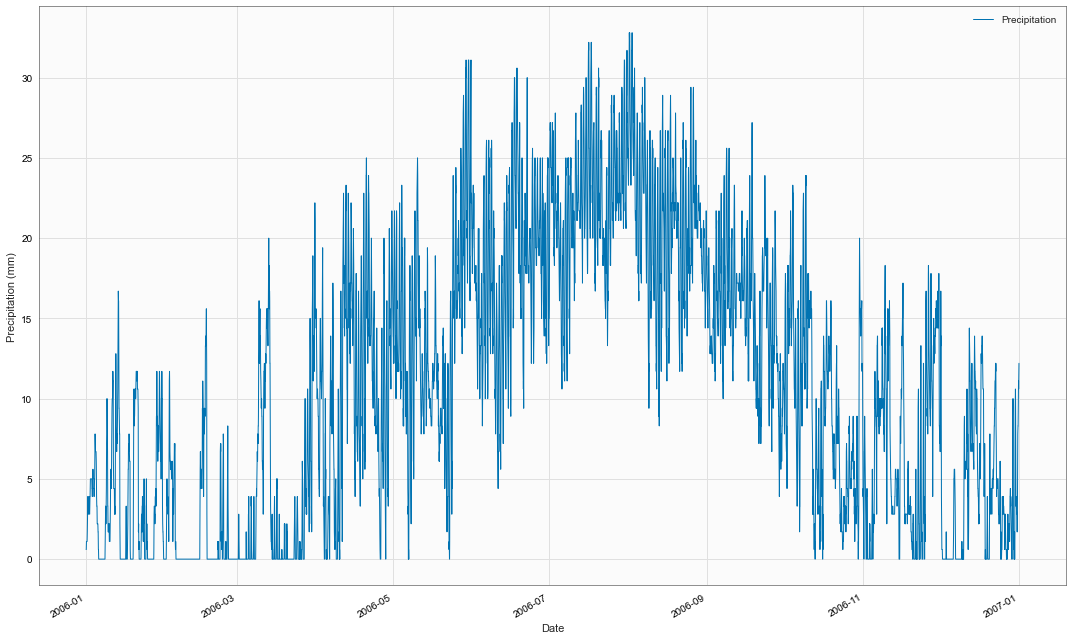

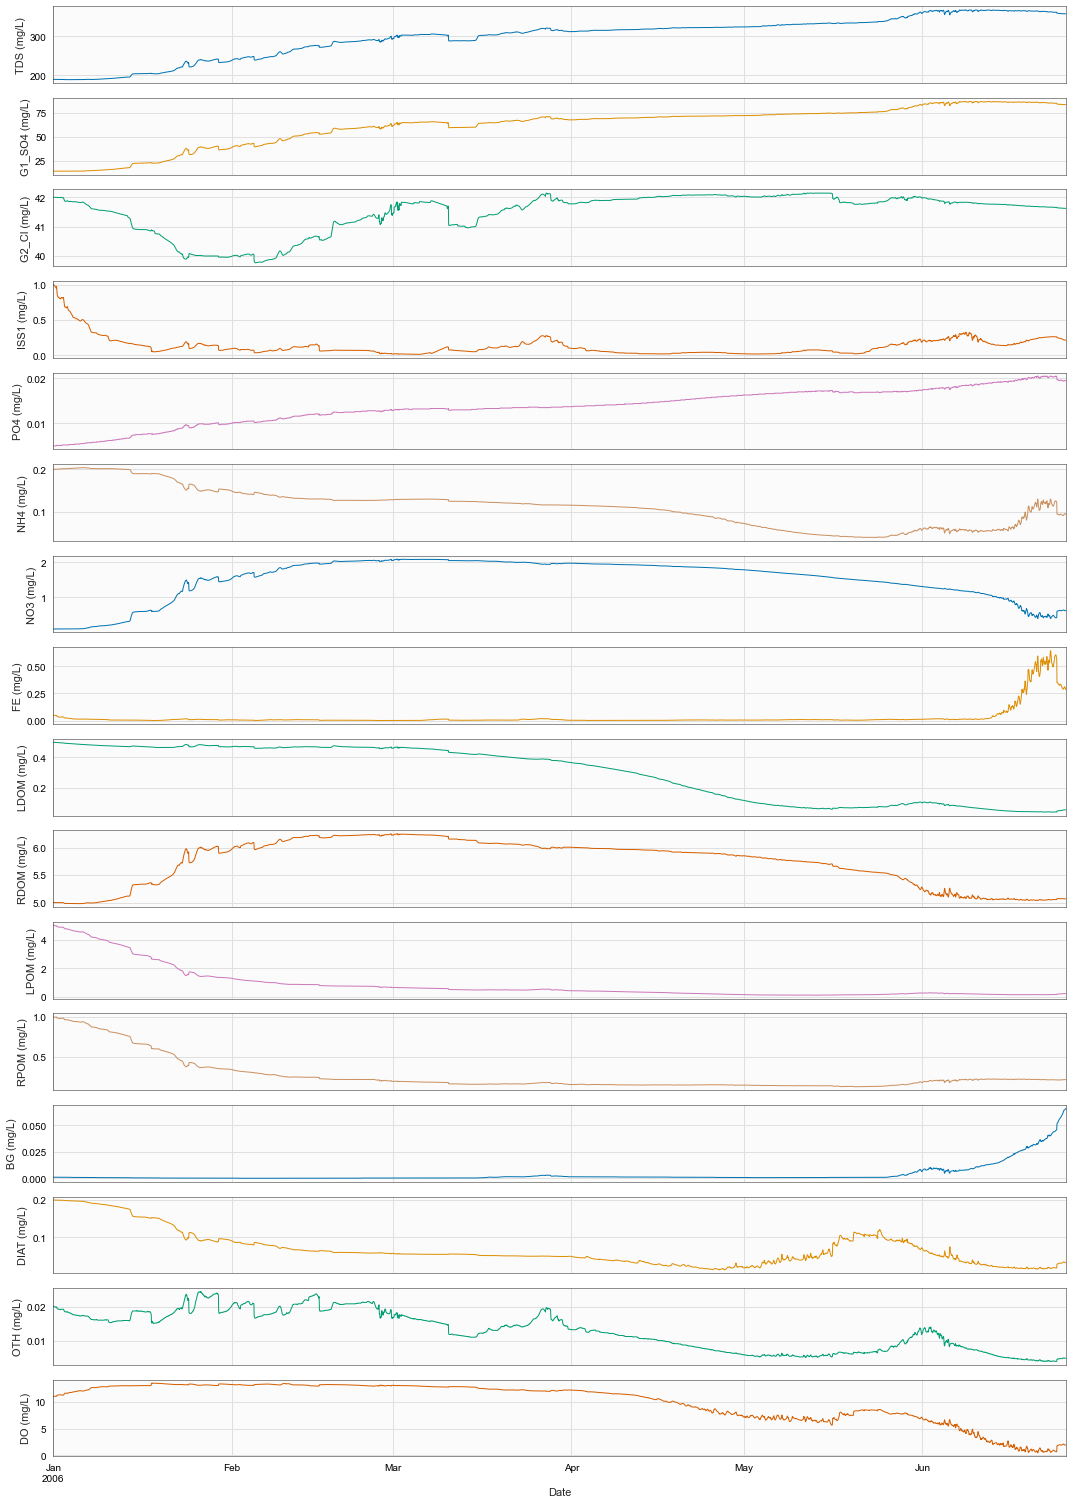

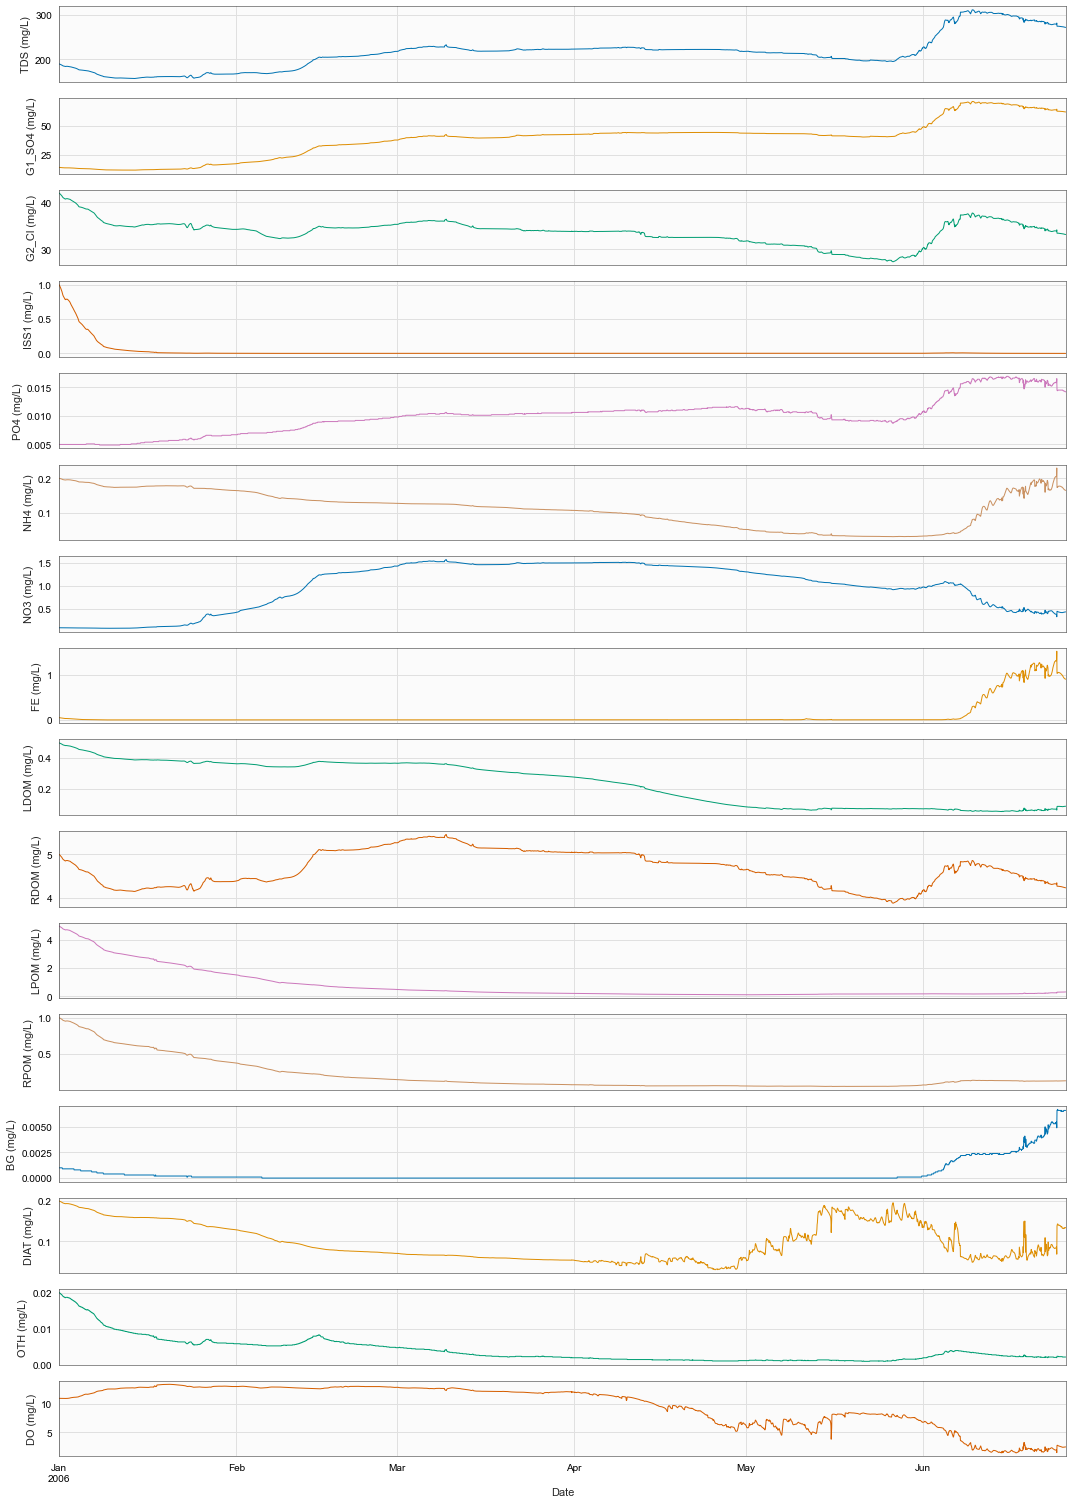

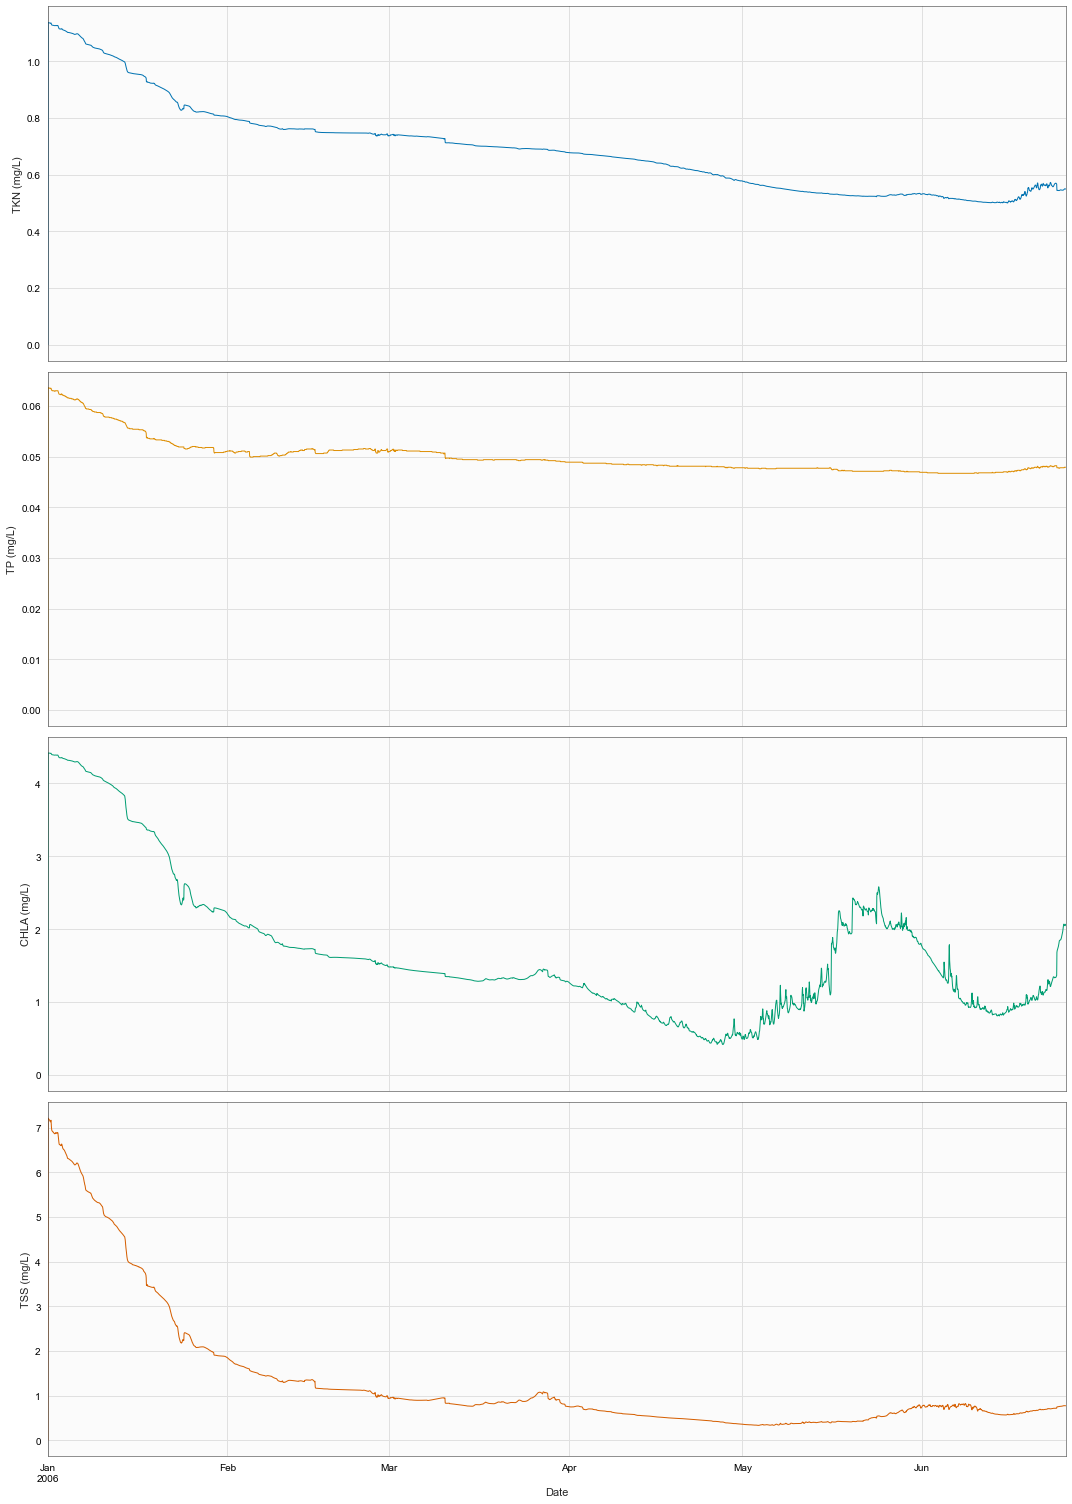

In [20]:
import w2

year = 2006

d = df.to_dict(orient='index')
for i in d:
    filename = d[i]['Filename']
    columns = d[i]['Columns']
    plot_type = d[i]['Plot_Type']
    ylabels = d[i]['Labels']
    path = os.path.join('BerlinMilton2006', filename)
    aaa = w2.read(path, year, columns)
    if plot_type == 'single':
        myplot = w2.plot(aaa, ylabel=ylabels[0])
    elif plot_type == 'multi':
        myplot = w2.multiplot(aaa, ylabels=ylabels)
    else:
        print('Plot type not specified')
    myplot.get_figure().savefig(filename + '.png')